In [20]:
import pandas as pd
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap


In [21]:
#load the data
data = pd.read_excel('TFG database.xlsx',
                     index_col='observation_date')


# Here we stablish Filters to create data Groups for Exploratory data Analysis  
filter_col0 = [col for col in data if col.startswith('G0_')]
filter_col1 = [col for col in data if col.startswith('G1_')]
filter_col2 = [col for col in data if col.startswith('G2_')]
filter_col3 = [col for col in data if col.startswith('G3_')]
filter_col4 = [col for col in data if col.startswith('G4_')]
filter_col5 = [col for col in data if col.startswith('G5_')]
filter_col6 = [col for col in data if col.startswith('G6_')]
filter_col7 = [col for col in data if col.startswith('G7_')]
filter_col8 = [col for col in data if col.startswith('G8_')]


In [22]:
data

,G0_CPI,G0_CPI_1M,G0_CPI_2M,G0_CPI_3M,G0_CPI_4M,G0_CPI_5M,G0_CPI_6M,G1_CPIAPPSL,G1_CPITRNSL,G1_CPIULFSL,...,G8_HOUSTMW,G8_HOUSTNE,G8_HOUSTS,G8_HOUSTW,G8_HOUST,G8_PERMITMW,G8_PERMITNE,G8_PERMITS,G8_PERMITW,G8_PERMIT
observation_date,,,,,,,,,,,,,,,,,,,,,
1968-02-01,0.002928,0.002920,0.002911,0.002903,0.005780,0.005747,0.002861,0.005742,0.002928,0.002920,...,5.918894,5.351858,6.464588,5.690359,7.326466,5.942799,5.411646,6.131226,5.624018,7.201916
1968-03-01,0.002920,0.002911,0.002903,0.005780,0.005747,0.002861,0.002853,0.005709,0.000000,0.002911,...,5.924256,5.198497,6.440947,5.645447,7.290293,5.805135,5.693732,6.118097,5.659482,7.222566
1968-04-01,0.002911,0.002903,0.005780,0.005747,0.002861,0.002853,0.005682,0.005676,-0.002928,0.002903,...,5.950643,5.411646,6.453625,5.739793,7.348588,5.799093,5.493061,6.100319,5.587249,7.159292
1968-05-01,0.002903,0.005780,0.005747,0.002861,0.002853,0.005682,0.002829,0.005644,0.000000,0.000000,...,5.852202,5.361292,6.357842,5.598422,7.249926,5.910797,5.384495,6.075346,5.616771,7.167809
1968-06-01,0.005780,0.005747,0.002861,0.002853,0.005682,0.002829,0.005634,0.003745,0.005848,0.008658,...,5.869297,5.393628,6.293419,5.666427,7.247793,5.758902,5.521461,6.139885,5.594711,7.170120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,0.010006,0.003954,0.009164,0.011809,-0.000339,0.002346,0.004119,0.005541,0.038225,0.012716,...,5.476464,5.351858,6.740519,6.040255,7.447751,5.560682,5.220356,6.879356,6.135565,7.538495
2022-04-01,0.003954,0.009164,0.011809,-0.000339,0.002346,0.004119,0.004871,-0.007561,-0.003800,0.002490,...,5.389072,4.890349,6.932448,6.059123,7.498316,5.521461,5.093750,6.896694,6.042633,7.508239
2022-05-01,0.009164,0.011809,-0.000339,0.002346,0.004119,0.004871,0.002048,0.006640,0.019810,0.009384,...,5.438079,4.867534,6.756932,5.834811,7.353722,5.438079,4.852030,6.846943,5.981414,7.435438


In [23]:
datay = data[{'G0_CPI', 'G0_CPI_1M', 'G0_CPI_2M','G0_CPI_3M','G0_CPI_4M','G0_CPI_5M','G0_CPI_6M'}]
columns_to_drop = ['G0_CPI', 'G0_CPI_1M', 'G0_CPI_2M','G0_CPI_3M','G0_CPI_4M','G0_CPI_5M','G0_CPI_6M']
datax = data.drop(columns_to_drop, axis=1)

X = datax# Assuming 'target' is the column containing the labels
y=datay

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [5]:
y

,G0_CPI_1M,G0_CPI_6M,G0_CPI_3M,G0_CPI_2M,G0_CPI,G0_CPI_5M,G0_CPI_4M
observation_date,,,,,,,
1968-02-01,0.002920,0.002861,0.002903,0.002911,0.002928,0.005747,0.005780
1968-03-01,0.002911,0.002853,0.005780,0.002903,0.002920,0.002861,0.005747
1968-04-01,0.002903,0.005682,0.005747,0.005780,0.002911,0.002853,0.002861
1968-05-01,0.005780,0.002829,0.002861,0.005747,0.002903,0.005682,0.002853
1968-06-01,0.005747,0.005634,0.002853,0.002861,0.005780,0.002829,0.005682
...,...,...,...,...,...,...,...
2022-03-01,0.003954,0.004119,0.011809,0.009164,0.010006,0.002346,-0.000339
2022-04-01,0.009164,0.004871,-0.000339,0.011809,0.003954,0.004119,0.002346
2022-05-01,0.011809,0.002048,0.002346,-0.000339,0.009164,0.004871,0.004119


In [6]:
#Creating Regimes Hihg , Normal and Low inflation (Just in case) 

#import pandas as pd
#data = {'CPI'}

#df = pd.DataFrame(data)

# Define the bin edges
bins = [-0.1, 0.00167, 0.00495, 0.1]

# Define the labels for the bins
labels = ['low', 'normal', 'high']

# Create a new column with categorical age groups
regime=datay['CPI_Catregimes'] = pd.cut(datay['G0_CPI'], bins=bins, labels=labels)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
datay

,G0_CPI_1M,G0_CPI_6M,G0_CPI_3M,G0_CPI_2M,G0_CPI,G0_CPI_5M,G0_CPI_4M,CPI_Catregimes
observation_date,,,,,,,,
1968-02-01,0.002920,0.002861,0.002903,0.002911,0.002928,0.005747,0.005780,normal
1968-03-01,0.002911,0.002853,0.005780,0.002903,0.002920,0.002861,0.005747,normal
1968-04-01,0.002903,0.005682,0.005747,0.005780,0.002911,0.002853,0.002861,normal
1968-05-01,0.005780,0.002829,0.002861,0.005747,0.002903,0.005682,0.002853,normal
1968-06-01,0.005747,0.005634,0.002853,0.002861,0.005780,0.002829,0.005682,high
...,...,...,...,...,...,...,...,...
2022-03-01,0.003954,0.004119,0.011809,0.009164,0.010006,0.002346,-0.000339,high
2022-04-01,0.009164,0.004871,-0.000339,0.011809,0.003954,0.004119,0.002346,normal
2022-05-01,0.011809,0.002048,0.002346,-0.000339,0.009164,0.004871,0.004119,high


In [8]:
#Creating Data Groups
datay_g0=datay[filter_col0]
datax_g1=datax[filter_col1]
datax_g2=datax[filter_col2]
datax_g3=datax[filter_col3]
datax_g4=datax[filter_col4]
datax_g5=datax[filter_col5]
datax_g6=datax[filter_col6]
datax_g7=datax[filter_col7]
datax_g8=datax[filter_col8]
#data_g9=data[filter_col9]
#data_g10=data[filter_col10]

In [9]:
datax_g1.describe()

,G1_CPIAPPSL,G1_CPITRNSL,G1_CPIULFSL,G1_CUSR0000SA0L5,G1_CUUR0000SA0L2,G1_CUSR0000SAC,G1_CUUR0000SAD,G1_CPIMEDSL,G1_DDURRG3M086SBEA,G1_DNDGRG3M086SBEA,G1_DSERRG3M086SBEA,G1_CUSR0000SAS
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,0.001372,0.003191,0.003286,0.003223,0.003121,0.002739,0.001793,0.004492,0.000754,0.002654,0.003418,0.003841
std,0.004964,0.011653,0.003533,0.003450,0.004474,0.005583,0.004906,0.002827,0.003619,0.006239,0.002160,0.002936
min,-0.040271,-0.108434,-0.021149,-0.019221,-0.027958,-0.044641,-0.011347,-0.006173,-0.009053,-0.049859,-0.007318,-0.008222
25%,-0.001328,-0.000996,0.001487,0.001453,0.000696,0.000000,-0.001523,0.002668,-0.001778,-0.000143,0.002002,0.002160
50%,0.001634,0.003381,0.002872,0.002784,0.002844,0.002577,0.001086,0.003986,0.000508,0.002559,0.002908,0.002944
75%,0.004321,0.007987,0.005018,0.004910,0.005483,0.005180,0.004003,0.006173,0.002534,0.005417,0.004490,0.004811
max,0.018532,0.057002,0.016529,0.017778,0.020630,0.027483,0.037388,0.017835,0.016864,0.029686,0.011143,0.017880



data_g1[data_g1.isna().any(axis=1)]

In [10]:
#Here we are concatenating to include the dependent variable to the groups of data. We are concatenating
#only for t+1 inflation 
data_g1_cpi_1m=pd.concat([datay['G0_CPI_1M'],datax_g1], axis=1)
data_g2_cpi_1m=pd.concat([datay['G0_CPI_1M'],datax_g2], axis=1)
data_g3_cpi_1m=pd.concat([datay['G0_CPI_1M'],datax_g3], axis=1)
data_g4_cpi_1m=pd.concat([datay['G0_CPI_1M'],datax_g4], axis=1)
data_g5_cpi_1m=pd.concat([datay['G0_CPI_1M'],datax_g5], axis=1)
data_g6_cpi_1m=pd.concat([datay['G0_CPI_1M'],datax_g6], axis=1)
data_g7_cpi_1m=pd.concat([datay['G0_CPI_1M'],datax_g7], axis=1)
data_g8_cpi_1m=pd.concat([datay['G0_CPI_1M'],datax_g8], axis=1)
#data_g9_cpi_3m=pd.concat([data['CPI_3M'],data_g9], axis=1)
#data_g10_cpi_3m=pd.concat([data['CPI_3M'],data_g10], axis=1)




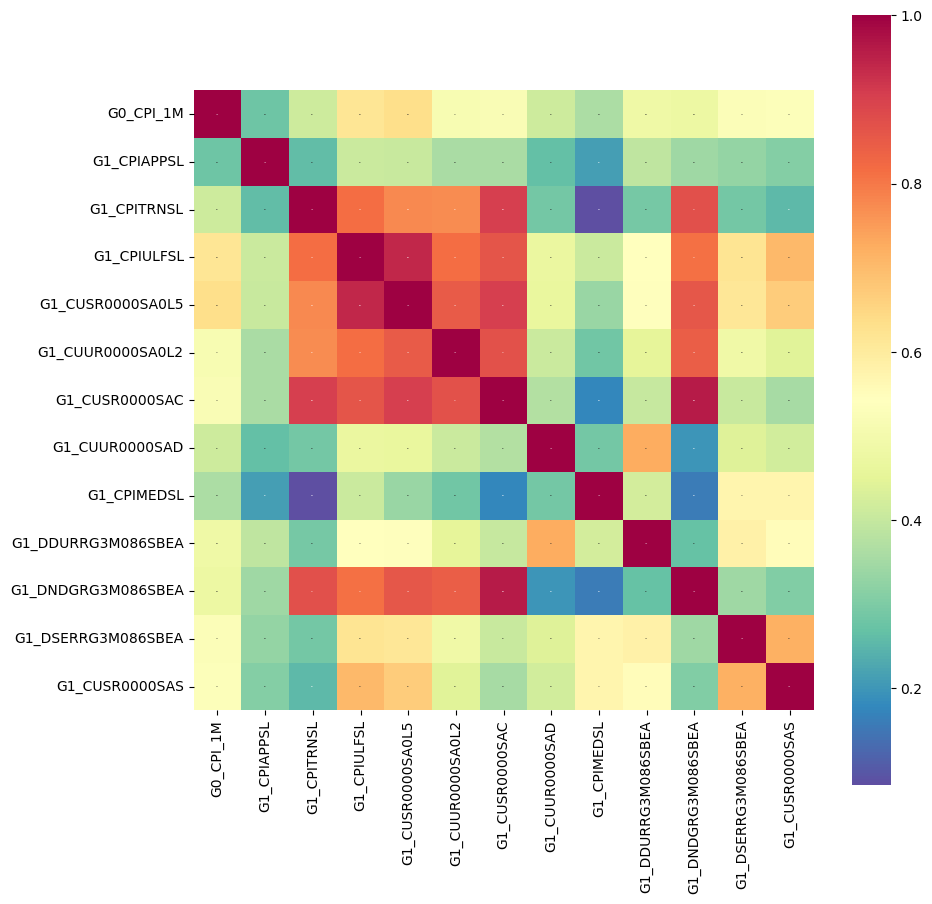

In [11]:
# Cross Correlation by Groups including the dependent 

plt.figure(figsize=(10, 10))


#Define Group of Variables Coorelation Matrix from 1 to 10

corrmat = data_g1_cpi_1m.corr()

#Plot the Graph 

hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 0.1}, 
                 yticklabels=corrmat, 
                 xticklabels=corrmat, 
                 cmap="Spectral_r")
plt.show()

In [12]:
# Estimaciones de los Modelos
datax.isna().sum()

G1_CPIAPPSL         0
G1_CPITRNSL         0
G1_CPIULFSL         0
G1_CUSR0000SA0L5    0
G1_CUUR0000SA0L2    0
                   ..
G8_PERMITMW         0
G8_PERMITNE         0
G8_PERMITS          0
G8_PERMITW          0
G8_PERMIT           0
Length: 92, dtype: int64

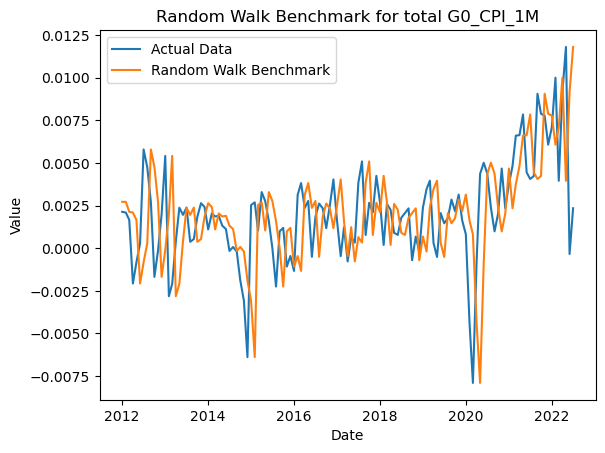

MAE_RW_tot for G0_CPI_1M: 0.002526603567244873
RMSE_RW_tot for G0_CPI_1M: 0.0033985276639795633


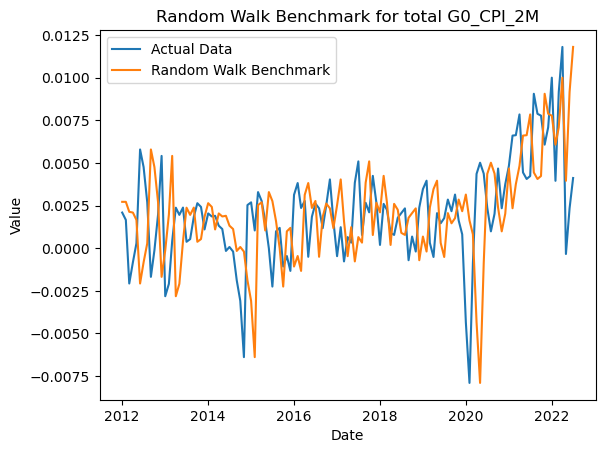

MAE_RW_tot for G0_CPI_2M: 0.002722703900040498
RMSE_RW_tot for G0_CPI_2M: 0.0035180897664895843


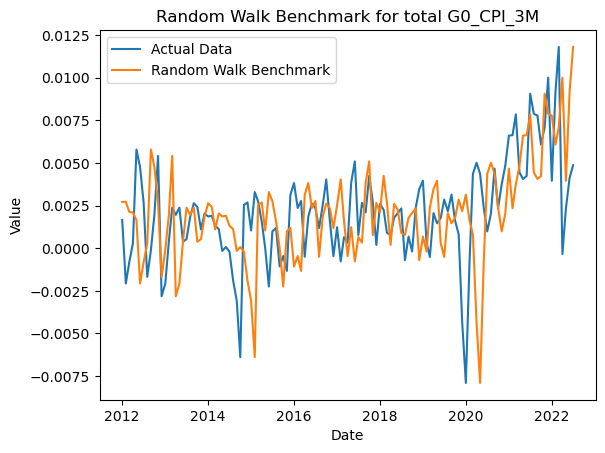

MAE_RW_tot for G0_CPI_3M: 0.0026070248380272183
RMSE_RW_tot for G0_CPI_3M: 0.0034683106904964075


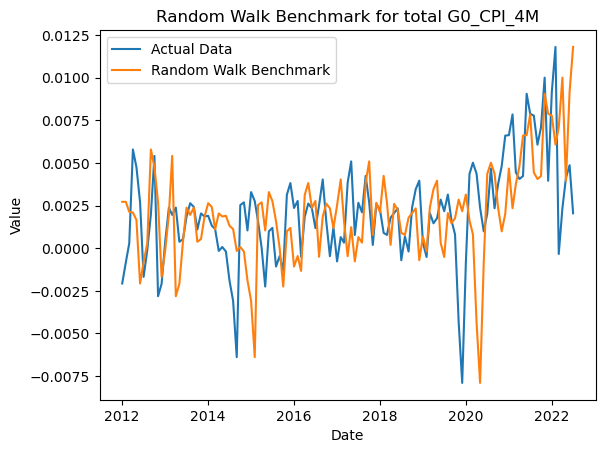

MAE_RW_tot for G0_CPI_4M: 0.0024934750490665544
RMSE_RW_tot for G0_CPI_4M: 0.0033537918518288037


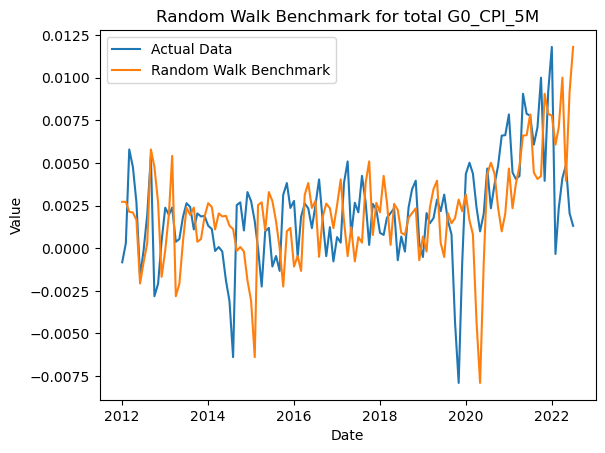

MAE_RW_tot for G0_CPI_5M: 0.002646731357200704
RMSE_RW_tot for G0_CPI_5M: 0.0034415520178935266


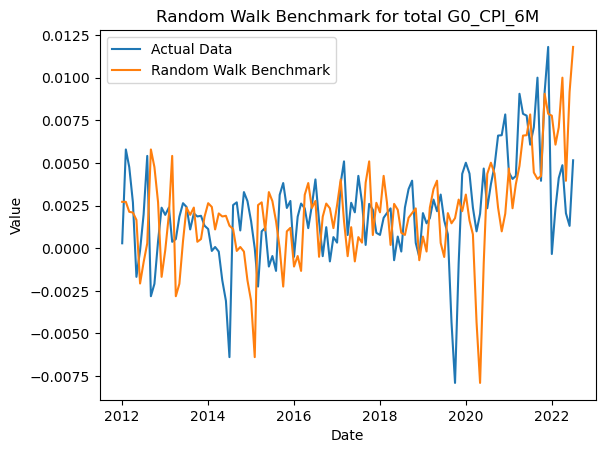

MAE_RW_tot for G0_CPI_6M: 0.002763634240335592
RMSE_RW_tot for G0_CPI_6M: 0.003460517194578493
MAE_RW_tot: {'G0_CPI_1M': 0.002526603567244873, 'G0_CPI_2M': 0.002722703900040498, 'G0_CPI_3M': 0.0026070248380272183, 'G0_CPI_4M': 0.0024934750490665544, 'G0_CPI_5M': 0.002646731357200704, 'G0_CPI_6M': 0.002763634240335592}
RMSE_RW_tot: {'G0_CPI_1M': 0.0033985276639795633, 'G0_CPI_2M': 0.0035180897664895843, 'G0_CPI_3M': 0.0034683106904964075, 'G0_CPI_4M': 0.0033537918518288037, 'G0_CPI_5M': 0.0034415520178935266, 'G0_CPI_6M': 0.003460517194578493}


In [24]:
#BENCHMARK I: RECURSIVE BEANCHMARK RANDOM WALK IN VECTORS FOR TOTAL

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assume your time series DataFrame is called 'data' and has a datetime index
# I've also assumed you have the target variables in the same DataFrame

mask_train = (data.index.year <= 2011)
mask_test = (data.index.year >= 2012)

X_train = data.loc[mask_train, "G0_CPI"]
X_test = data.loc[mask_test, "G0_CPI"]

target_variables = ['G0_CPI_1M', 'G0_CPI_2M', 'G0_CPI_3M', 'G0_CPI_4M', 'G0_CPI_5M', 'G0_CPI_6M']

mae_RW_list_tot = []
rmse_RW_list_tot = []

class NaiveForecaster:
    def __init__(self):
        pass

    def fit(self, X, y=None):
        pass

    def predict(self, X_test):
        return X_test.shift(1).fillna(method='bfill')

for target in target_variables:
    y_train = data.loc[mask_train, target]
    y_test = data.loc[mask_test, target]

    naive_forecaster = NaiveForecaster()
    naive_forecaster.fit(X_train)

    y_pred = naive_forecaster.predict(X_test)

    mse_RW_tot = mean_squared_error(y_test, y_pred)

    plt.plot(y_test.index, y_test, label='Actual Data')
    plt.plot(y_test.index, y_pred, label='Random Walk Benchmark')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Random Walk Benchmark for total {target}')
    plt.legend()
    plt.show()

    mae_RW_tot = mean_absolute_error(y_test, y_pred)
    print(f"MAE_RW_tot for {target}:", mae_RW_tot)
    mae_RW_list_tot.append(mae_RW_tot)

    rmse_RW_tot = np.sqrt(mse_RW_tot)
    print(f"RMSE_RW_tot for {target}:", rmse_RW_tot)
    rmse_RW_list_tot.append(rmse_RW_tot)

mae_RW_dict_tot = dict(zip(target_variables, mae_RW_list_tot))
rmse_RW_dict_tot = dict(zip(target_variables, rmse_RW_list_tot))

print("MAE_RW_tot:", mae_RW_dict_tot)
print("RMSE_RW_tot:", rmse_RW_dict_tot)

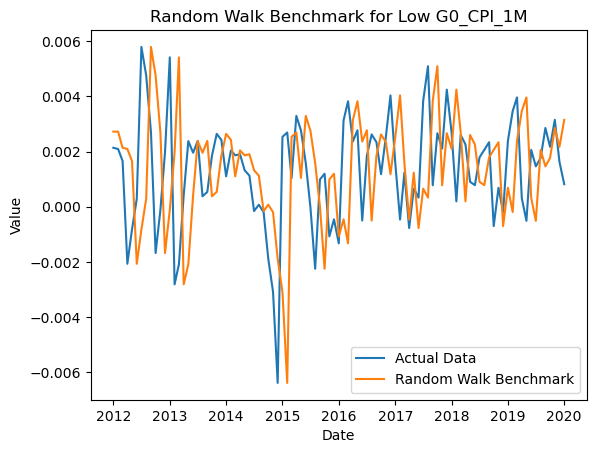

MAE_RW_low for G0_CPI_1M: 0.0021806479730785634
RMSE_RW_low for G0_CPI_1M: 0.002827463753965957


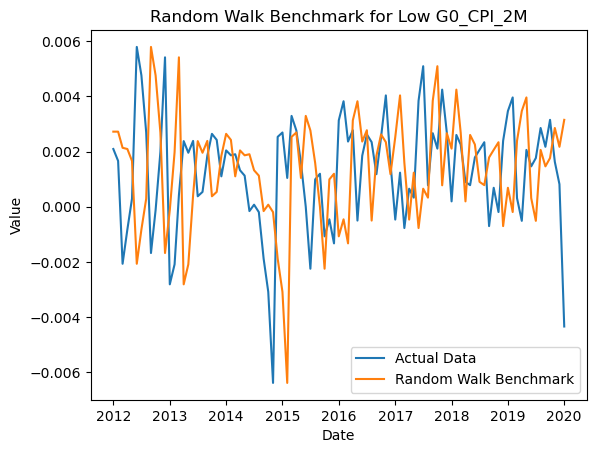

MAE_RW_low for G0_CPI_2M: 0.0023968888104645685
RMSE_RW_low for G0_CPI_2M: 0.0030682457756940973


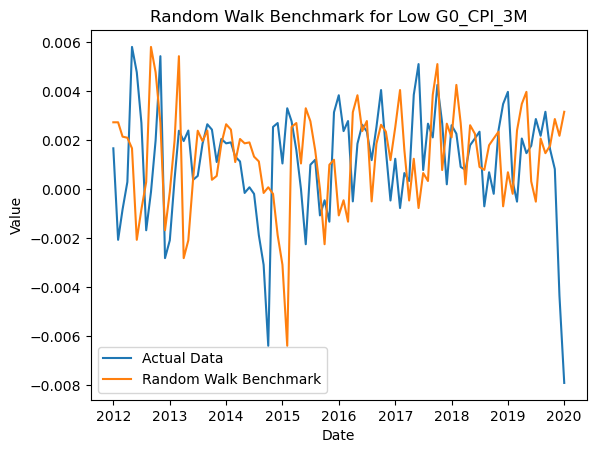

MAE_RW_low for G0_CPI_3M: 0.002292562361721016
RMSE_RW_low for G0_CPI_3M: 0.0030531660247051064


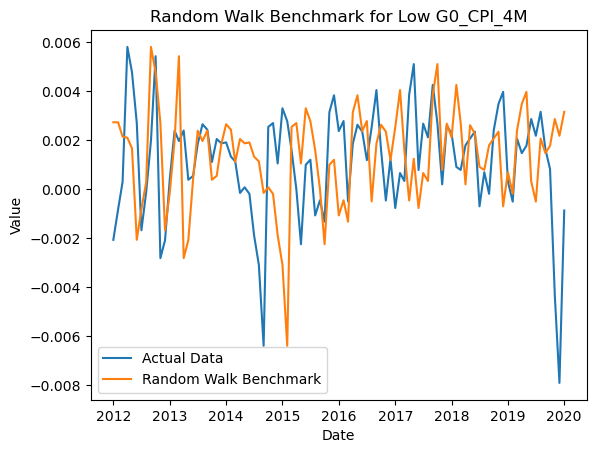

MAE_RW_low for G0_CPI_4M: 0.002176246488556097
RMSE_RW_low for G0_CPI_4M: 0.0029109533675143085


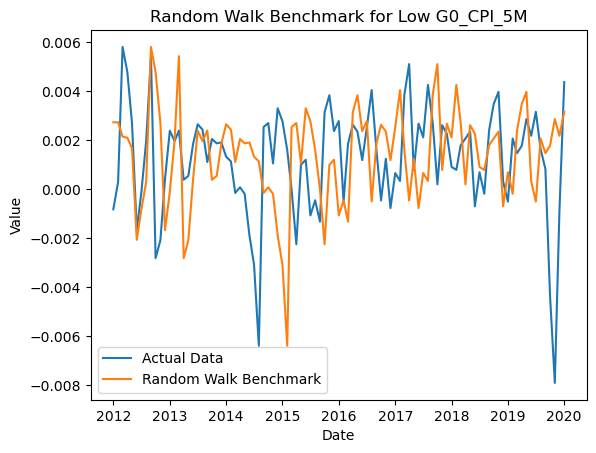

MAE_RW_low for G0_CPI_5M: 0.0023506004937330236
RMSE_RW_low for G0_CPI_5M: 0.0030617995490997353


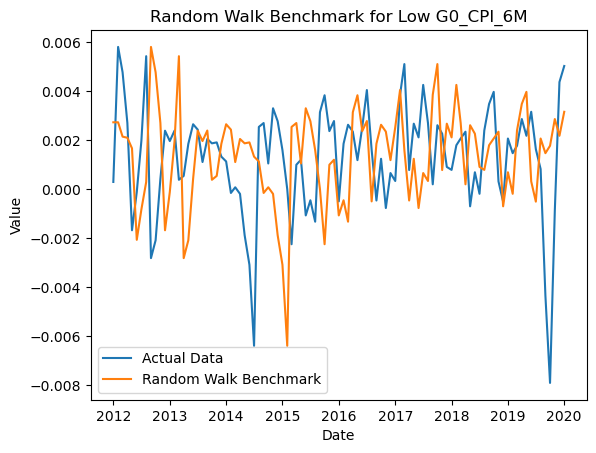

MAE_RW_low for G0_CPI_6M: 0.0025393461279898393
RMSE_RW_low for G0_CPI_6M: 0.003136088260583264
MAE_RW_low: {'G0_CPI_1M': 0.0021806479730785634, 'G0_CPI_2M': 0.0023968888104645685, 'G0_CPI_3M': 0.002292562361721016, 'G0_CPI_4M': 0.002176246488556097, 'G0_CPI_5M': 0.0023506004937330236, 'G0_CPI_6M': 0.0025393461279898393}
RMSE_RW_low: {'G0_CPI_1M': 0.002827463753965957, 'G0_CPI_2M': 0.0030682457756940973, 'G0_CPI_3M': 0.0030531660247051064, 'G0_CPI_4M': 0.0029109533675143085, 'G0_CPI_5M': 0.0030617995490997353, 'G0_CPI_6M': 0.003136088260583264}


In [25]:
#BENCHMARK I: RECURSIVE BEANCHMARK RANDOM WALK IN VECTORS FOR LOW

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assume your time series DataFrame is called 'data' and has a datetime index
# I've also assumed you have the target variables in the same DataFrame

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2012) & (data.index.year < 2020) ) | ((data.index.month <= 1) & (data.index.year == 2020))



X_train = data.loc[mask_train, "G0_CPI"]
X_test = data.loc[mask_test, "G0_CPI"]

target_variables = ['G0_CPI_1M', 'G0_CPI_2M', 'G0_CPI_3M', 'G0_CPI_4M', 'G0_CPI_5M', 'G0_CPI_6M']

mae_RW_list_low = []
rmse_RW_list_low = []

class NaiveForecaster:
    def __init__(self):
        pass

    def fit(self, X, y=None):
        pass

    def predict(self, X_test):
        return X_test.shift(1).fillna(method='bfill')

for target in target_variables:
    y_train = data.loc[mask_train, target]
    y_test = data.loc[mask_test, target]

    naive_forecaster = NaiveForecaster()
    naive_forecaster.fit(X_train)

    y_pred = naive_forecaster.predict(X_test)

    mse_RW_low = mean_squared_error(y_test, y_pred)

    plt.plot(y_test.index, y_test, label='Actual Data')
    plt.plot(y_test.index, y_pred, label='Random Walk Benchmark')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Random Walk Benchmark for Low {target}')
    plt.legend()
    plt.show()

    mae_RW_low = mean_absolute_error(y_test, y_pred)
    print(f"MAE_RW_low for {target}:", mae_RW_low)
    mae_RW_list_low.append(mae_RW_low)

    rmse_RW_low = np.sqrt(mse_RW_low)
    print(f"RMSE_RW_low for {target}:", rmse_RW_low)
    rmse_RW_list_low.append(rmse_RW_low)

mae_RW_dict_low = dict(zip(target_variables, mae_RW_list_low))
rmse_RW_dict_low = dict(zip(target_variables, rmse_RW_list_low))

print("MAE_RW_low:", mae_RW_dict_low)
print("RMSE_RW_low:", rmse_RW_dict_low)

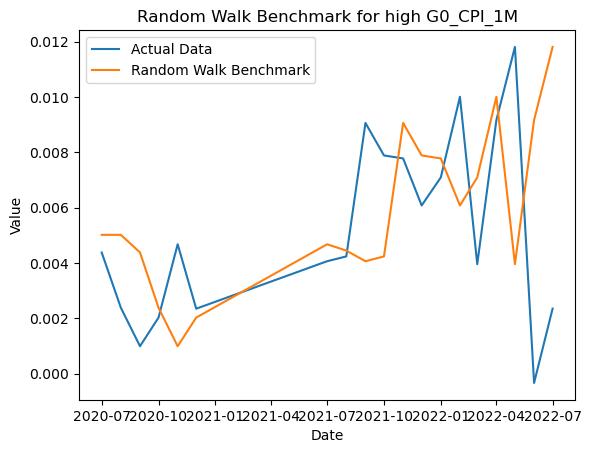

MAE_RW_high for G0_CPI_1M: 0.0031055140271850925
RMSE_RW_high for G0_CPI_1M: 0.00425704716995632


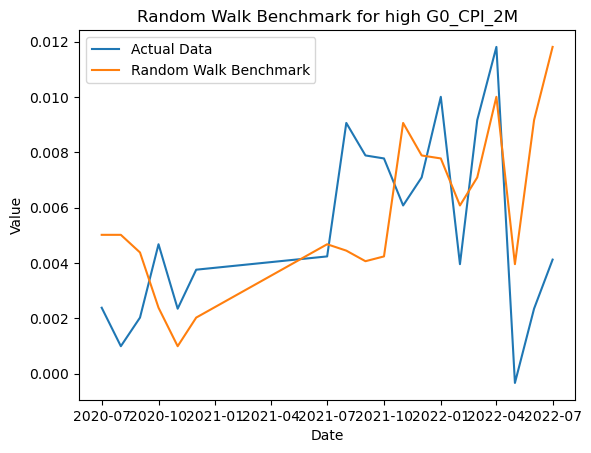

MAE_RW_high for G0_CPI_2M: 0.0030330860073073864
RMSE_RW_high for G0_CPI_2M: 0.0035399332992603954


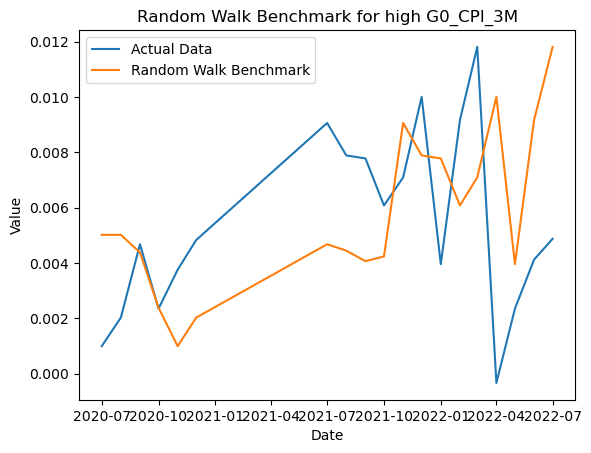

MAE_RW_high for G0_CPI_3M: 0.0034717247828293927
RMSE_RW_high for G0_CPI_3M: 0.004148774539243834


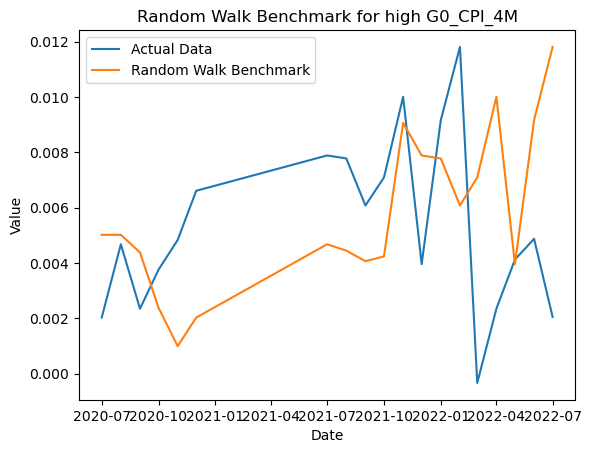

MAE_RW_high for G0_CPI_4M: 0.00357287400850986
RMSE_RW_high for G0_CPI_4M: 0.004372345608211359


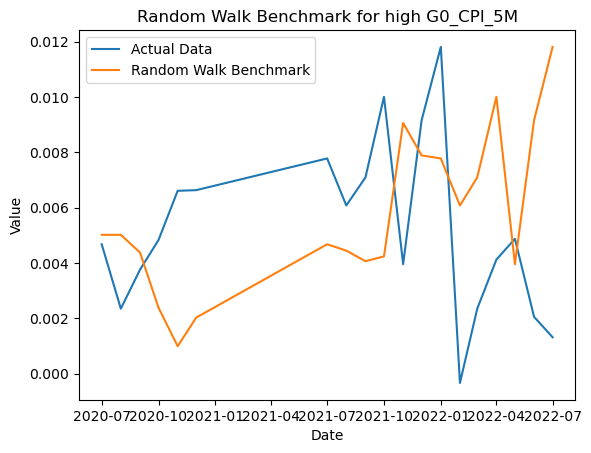

MAE_RW_high for G0_CPI_5M: 0.003991492414117045
RMSE_RW_high for G0_CPI_5M: 0.004730420480462656


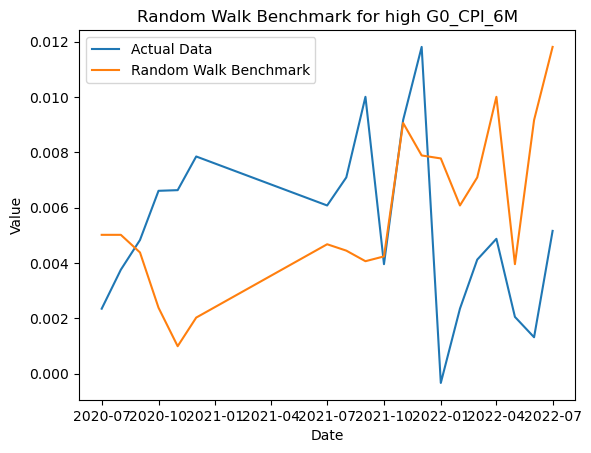

MAE_RW_high for G0_CPI_6M: 0.003723248699200616
RMSE_RW_high for G0_CPI_6M: 0.004453729789330685
MAE_RW_high: {'G0_CPI_1M': 0.0031055140271850925, 'G0_CPI_2M': 0.0030330860073073864, 'G0_CPI_3M': 0.0034717247828293927, 'G0_CPI_4M': 0.00357287400850986, 'G0_CPI_5M': 0.003991492414117045, 'G0_CPI_6M': 0.003723248699200616}
RMSE_RW_high: {'G0_CPI_1M': 0.00425704716995632, 'G0_CPI_2M': 0.0035399332992603954, 'G0_CPI_3M': 0.004148774539243834, 'G0_CPI_4M': 0.004372345608211359, 'G0_CPI_5M': 0.004730420480462656, 'G0_CPI_6M': 0.004453729789330685}


In [26]:
#BENCHMARK I: RECURSIVE BEANCHMARK RANDOM WALK IN VECTORS FOR HIGH

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2020) & (data.index.month >= 7) ) | ((data.index.month <= 12) & (data.index.year == 2022))




X_train = data.loc[mask_train, "G0_CPI"]
X_test = data.loc[mask_test, "G0_CPI"]

target_variables = ['G0_CPI_1M', 'G0_CPI_2M', 'G0_CPI_3M', 'G0_CPI_4M', 'G0_CPI_5M', 'G0_CPI_6M']

mae_RW_list_high = []
rmse_RW_list_high = []

class NaiveForecaster:
    def __init__(self):
        pass

    def fit(self, X, y=None):
        pass

    def predict(self, X_test):
        return X_test.shift(1).fillna(method='bfill')

for target in target_variables:
    y_train = data.loc[mask_train, target]
    y_test = data.loc[mask_test, target]

    naive_forecaster = NaiveForecaster()
    naive_forecaster.fit(X_train)

    y_pred = naive_forecaster.predict(X_test)

    mse_RW_high = mean_squared_error(y_test, y_pred)

    plt.plot(y_test.index, y_test, label='Actual Data')
    plt.plot(y_test.index, y_pred, label='Random Walk Benchmark')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Random Walk Benchmark for high {target}')
    plt.legend()
    plt.show()

    mae_RW_high = mean_absolute_error(y_test, y_pred)
    print(f"MAE_RW_high for {target}:", mae_RW_high)
    mae_RW_list_high.append(mae_RW_high)

    rmse_RW_high = np.sqrt(mse_RW_high)
    print(f"RMSE_RW_high for {target}:", rmse_RW_high)
    rmse_RW_list_high.append(rmse_RW_high)

mae_RW_dict_high = dict(zip(target_variables, mae_RW_list_high))
rmse_RW_dict_high = dict(zip(target_variables, rmse_RW_list_high))

print("MAE_RW_high:", mae_RW_dict_high)
print("RMSE_RW_high:", rmse_RW_dict_high)

In [17]:
#Model I :  LINEAR REGRESSION MODEL (RECURSIVE) VECTORS         (TOTAL)
# WITH SPECIFIC SAMPLES 2012 to END 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = (data.index.year >= 2012) 
             
X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_lin_list_tot = []
rmse_lin_list_tot = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]


    # Create and fit the Random Forest model
    n_estimators = 100  # Number of trees in the forest
    lin = LinearRegression()
    lin.fit(X_train, y_train)


    
    # Make predictions
    y_pred = lin.predict(X_test)

    # Evaluate the model
    mse_lin_tot = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for tot {target_var}: {mse_lin_tot:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_lin_tot = mean_absolute_error(y_test, y_pred)
    print(f"MAE_lin_tot for {target_var}: {mae_lin_tot}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_lin_list_tot.append(mae_lin_tot)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_lin_tot = np.sqrt(mse_lin_tot)
    print(f"RMSE_lin_tot for {target_var}: {rmse_lin_tot}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_lin_list_tot.append(rmse_lin_tot)
    
    mae_lin_dict_tot = dict(zip(target_variables, mae_lin_list_tot))
    rmse_lin_dict_tot = dict(zip(target_variables, rmse_lin_list_tot))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_lin_tot = mae_lin_dict_tot[target_var] / mae_RW_dict_tot[target_var]
    Ratio_RMSE_lin_tot = rmse_lin_dict_tot[target_var] / rmse_RW_dict_tot[target_var]
    print(f"Ratio MAE_lin_tot for {target_var}: {Ratio_MAE_lin_tot}")
    print(f"Ratio RMSE_lin_tot for {target_var}: {Ratio_RMSE_lin_tot}\n")


Mean Squared Error for tot G0_CPI_1M: 0.00
MAE_lin_tot for G0_CPI_1M: 0.0052084402751637745
RMSE_lin_tot for G0_CPI_1M: 0.028979375899421626
Ratio MAE_lin_tot for G0_CPI_1M: 2.0614394528237376
Ratio RMSE_lin_tot for G0_CPI_1M: 8.527038401531719

Mean Squared Error for tot G0_CPI_2M: 0.00
MAE_lin_tot for G0_CPI_2M: 0.00477890475337689
RMSE_lin_tot for G0_CPI_2M: 0.022304242538260886
Ratio MAE_lin_tot for G0_CPI_2M: 1.7552054607575243
Ratio RMSE_lin_tot for G0_CPI_2M: 6.339873061430287

Mean Squared Error for tot G0_CPI_3M: 0.00
MAE_lin_tot for G0_CPI_3M: 0.006294332037537476
RMSE_lin_tot for G0_CPI_3M: 0.04021437511092752
Ratio MAE_lin_tot for G0_CPI_3M: 2.4143736360795507
Ratio RMSE_lin_tot for G0_CPI_3M: 11.594801821278525

Mean Squared Error for tot G0_CPI_4M: 0.01
MAE_lin_tot for G0_CPI_4M: 0.011600619785186186
RMSE_lin_tot for G0_CPI_4M: 0.09800396344181178
Ratio MAE_lin_tot for G0_CPI_4M: 4.652390562130926
Ratio RMSE_lin_tot for G0_CPI_4M: 29.22183837627573

Mean Squared Error for

In [ ]:
#Model I :  LINEAR REGRESSION MODEL (RECURSIVE) VECTORS         (LOW)
# WITH SPECIFIC SAMPLES 2012 to Jun 2020

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2012) & (data.index.year < 2020) ) | ((data.index.month <= 1) & (data.index.year == 2020))


X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_lin_list_low = []
rmse_lin_list_low = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]

    # Create and fit the Random Forest model
    n_estimators = 100  # Number of trees in the forest
    lin = LinearRegression()
    lin.fit(X_train, y_train)


    
    # Make predictions
    y_pred = lin.predict(X_test)

    # Evaluate the model
    mse_lin_low = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for low{target_var}: {mse_lin_low:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_lin_low = mean_absolute_error(y_test, y_pred)
    print(f"MAE_lin_low for {target_var}: {mae_lin_low}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_lin_list_low.append(mae_lin_low)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_lin_low = np.sqrt(mse_lin_low)
    print(f"RMSE_lin_low for {target_var}: {rmse_lin_low}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_lin_list_low.append(rmse_lin_low)
    
    mae_lin_dict_low = dict(zip(target_variables, mae_lin_list_low))
    rmse_lin_dict_low = dict(zip(target_variables, rmse_lin_list_low))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_lin_low = mae_lin_dict_low[target_var] / mae_RW_dict_low[target_var]
    Ratio_RMSE_lin_low = rmse_lin_dict_low[target_var] / rmse_RW_dict_low[target_var]
    print(f"Ratio MAE_lin_low for {target_var}: {Ratio_MAE_lin_low}")
    print(f"Ratio RMSE_lin_low for {target_var}: {Ratio_RMSE_lin_low}\n")


In [ ]:
#Model I :  LINEAR REGRESSION MODEL (RECURSIVE) VECTORS        (HIGH)
# WITH SPECIFIC   Jul 2020 to end
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2020) & (data.index.month >= 7) ) | ((data.index.month <= 12) & (data.index.year == 2022))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_lin_list_high = []
rmse_lin_list_high = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]

    # Create and fit the Random Forest model
    n_estimators = 100  # Number of trees in the forest
    lin = LinearRegression()
    lin.fit(X_train, y_train)


    
    # Make predictions
    y_pred = lin.predict(X_test)

    # Evaluate the model
    mse_lin_high = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for high{target_var}: {mse_lin_high:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_lin_high = mean_absolute_error(y_test, y_pred)
    print(f"MAE_lin_high for {target_var}: {mae_lin_high}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_lin_list_high.append(mae_lin_high)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_lin_high = np.sqrt(mse_lin_high)
    print(f"RMSE_lin_high for {target_var}: {rmse_lin_high}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_lin_list_high.append(rmse_lin_high)
    
    mae_lin_dict_high = dict(zip(target_variables, mae_lin_list_high))
    rmse_lin_dict_high = dict(zip(target_variables, rmse_lin_list_high))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_lin_high = mae_lin_dict_high[target_var] / mae_RW_dict_high[target_var]
    Ratio_RMSE_lin_high = rmse_lin_dict_high[target_var] / rmse_RW_dict_high[target_var]
    print(f"Ratio MAE_lin_high for {target_var}: {Ratio_MAE_lin_high}")
    print(f"Ratio RMSE_lin_high for {target_var}: {Ratio_RMSE_lin_high}\n")


In [ ]:
#Model 2 :  REGULARIZED LASSO REGRESSION MODEL (LASSO)RECURSIVE VECTORS      (TOTAL)
# WITH SPECIFIC SAMPLES 2012 to END 
import math
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = (data.index.year >= 2012) 
             
X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]
# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_lasso_cv_list_tot = []
rmse_lasso_cv_list_tot = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]
    
    # Create and fit the Lasso model
   

    alphas = np.logspace(-4, 1, 100)  # List of alpha values to test
    lasso_cv = LassoCV(alphas=alphas, cv=10)  # cv parameter sets the number of cross-validation folds
    lasso_cv.fit(X_train, y_train)
    
    # Make predictions
    y_pred = lasso_cv.predict(X_test)

     # Evaluate the model
    mse_lasso_cv_tot = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for tot {target_var}: {mse_lasso_cv_tot:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_lasso_cv_tot = mean_absolute_error(y_test, y_pred)
    print(f"MAE_lasso_cv_tot for {target_var}: {mae_lasso_cv_tot}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_lasso_cv_list_tot.append(mae_lasso_cv_tot)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_lasso_cv_tot = np.sqrt(mse_lasso_cv_tot)
    print(f"RMSE_lasso_cv_tot for {target_var}: {rmse_lasso_cv_tot}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_lasso_cv_list_tot.append(rmse_lasso_cv_tot)
    
    mae_lasso_cv_dict_tot = dict(zip(target_variables, mae_lasso_cv_list_tot))
    rmse_lasso_cv_dict_tot = dict(zip(target_variables, rmse_lasso_cv_list_tot))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_lasso_cv_tot = mae_lasso_cv_dict_tot[target_var] / mae_RW_dict_tot[target_var]
    Ratio_RMSE_lasso_cv_tot = rmse_lasso_cv_dict_tot[target_var] / rmse_RW_dict_tot[target_var]
    print(f"Ratio MAE_lasso_cv_tot for {target_var}: {Ratio_MAE_lasso_cv_tot}")
    print(f"Ratio RMSE_lasso_cv_tot for {target_var}: {Ratio_RMSE_lasso_cv_tot}\n")

    best_alpha_lasso = lasso_cv.alpha_
    best_exp_alpha_lasso = math.exp(best_alpha_lasso)

print("Optimal alpha:", best_alpha_lasso)
print("Optimal alpha EXP:", best_exp_alpha_lasso)  

In [ ]:
#Model 2 :  REGULARIZED LASSO REGRESSION MODEL (LASSO)RECURSIVE VECTORS          (LOW)
#WITH SPECIFIC SAMPLES 2012 to Jun 2020

import math
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2012) & (data.index.year < 2020) ) | ((data.index.month <= 1) & (data.index.year == 2020))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_lasso_cv_list_low = []
rmse_lasso_cv_list_low = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]
    
    # Create and fit the Lasso model
   

    alphas = np.logspace(-4, 1, 100)  # List of alpha values to test
    lasso_cv = LassoCV(alphas=alphas, cv=10)  # cv parameter sets the number of cross-validation folds
    lasso_cv.fit(X_train, y_train)
    
    # Make predictions
    y_pred = lasso_cv.predict(X_test)

     # Evaluate the model
    mse_lasso_cv_low = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for low {target_var}: {mse_lasso_cv_low:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_lasso_cv_low = mean_absolute_error(y_test, y_pred)
    print(f"MAE_lasso_cv_low for {target_var}: {mae_lasso_cv_low}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_lasso_cv_list_low.append(mae_lasso_cv_low)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_lasso_cv_low = np.sqrt(mse_lasso_cv_low)
    print(f"RMSE_lasso_cv_low for {target_var}: {rmse_lasso_cv_low}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_lasso_cv_list_low.append(rmse_lasso_cv_low)
    
    mae_lasso_cv_dict_low = dict(zip(target_variables, mae_lasso_cv_list_low))
    rmse_lasso_cv_dict_low = dict(zip(target_variables, rmse_lasso_cv_list_low))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_lasso_cv_low = mae_lasso_cv_dict_low[target_var] / mae_RW_dict_low[target_var]
    Ratio_RMSE_lasso_cv_low = rmse_lasso_cv_dict_low[target_var] / rmse_RW_dict_low[target_var]
    print(f"Ratio MAE_lasso_cv_low for {target_var}: {Ratio_MAE_lasso_cv_low}")
    print(f"Ratio RMSE_lasso_cv_low for {target_var}: {Ratio_RMSE_lasso_cv_low}\n")

    best_alpha_lasso = lasso_cv.alpha_
    best_exp_alpha_lasso = math.exp(best_alpha_lasso)

print("Optimal alpha:", best_alpha_lasso)
print("Optimal alpha EXP:", best_exp_alpha_lasso)  

In [ ]:
#Model 2 :  REGULARIZED LASSO REGRESSION MODEL (LASSO)RECURSIVE VECTORS      (HIGH)
# WITH SPECIFIC   Jul 2020 to end 

import math
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2020) & (data.index.month >= 7) ) | ((data.index.month <= 12) & (data.index.year == 2022))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_lasso_cv_list_high = []
rmse_lasso_cv_list_high = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]


    # Create and fit the Lasso model
   

    alphas = np.logspace(-4, 1, 100)  # List of alpha values to test
    lasso_cv = LassoCV(alphas=alphas, cv=10)  # cv parameter sets the number of cross-validation folds
    lasso_cv.fit(X_train, y_train)
    
    # Make predictions
    y_pred = lasso_cv.predict(X_test)

     # Evaluate the model
    mse_lasso_cv_high = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for high{target_var}: {mse_lasso_cv_high:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_lasso_cv_high = mean_absolute_error(y_test, y_pred)
    print(f"MAE_lasso_cv_high for {target_var}: {mae_lasso_cv_high}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_lasso_cv_list_high.append(mae_lasso_cv_high)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_lasso_cv_high = np.sqrt(mse_lasso_cv_high)
    print(f"RMSE_lasso_cv_high for {target_var}: {rmse_lasso_cv_high}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_lasso_cv_list_high.append(rmse_lasso_cv_high)
    
    mae_lasso_cv_dict_high = dict(zip(target_variables, mae_lasso_cv_list_high))
    rmse_lasso_cv_dict_high = dict(zip(target_variables, rmse_lasso_cv_list_high))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_lasso_cv_high = mae_lasso_cv_dict_high[target_var] / mae_RW_dict_high[target_var]
    Ratio_RMSE_lasso_cv_high = rmse_lasso_cv_dict_high[target_var] / rmse_RW_dict_high[target_var]
    print(f"Ratio MAE_lasso_cv_high for {target_var}: {Ratio_MAE_lasso_cv_high}")
    print(f"Ratio RMSE_lasso_cv_high for {target_var}: {Ratio_RMSE_lasso_cv_high}\n")

    best_alpha_lasso = lasso_cv.alpha_
    best_exp_alpha_lasso = math.exp(best_alpha_lasso)

print("Optimal alpha:", best_alpha_lasso)
print("Optimal alpha EXP:", best_exp_alpha_lasso)  



In [ ]:
#Model 2 :  REGULARIZED LINEAR REGRESSION MODEL (ridge) WITH SPECIFIC SAMPLES 2012 to END    (TOTAL)

import math
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2020) & (data.index.month >= 7) ) | ((data.index.month <= 12) & (data.index.year == 2022))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_ridge_cv_list_tot = []
rmse_ridge_cv_list_tot = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]

   
    # Create and fit the RidgeCV model
    alphas = np.logspace(-4, 1, 100)  # List of alpha values to test
    ridge_cv = RidgeCV(alphas=alphas, cv=10)  # cv parameter sets the number of cross-validation folds
    ridge_cv.fit(X_train, y_train)


    
    # Make predictions
    y_pred = ridge_cv.predict(X_test)
 
    # Evaluate the model
    mse_ridge_cv_tot = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for tot {target_var}: {mse_ridge_cv_tot:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_ridge_cv_tot = mean_absolute_error(y_test, y_pred)
    print(f"MAE_ridge_cv_tot for {target_var}: {mae_ridge_cv_tot}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_ridge_cv_list_tot.append(mae_ridge_cv_tot)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_ridge_cv_tot = np.sqrt(mse_ridge_cv_tot)
    print(f"RMSE_ridge_cv_tot for {target_var}: {rmse_ridge_cv_tot}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_ridge_cv_list_tot.append(rmse_ridge_cv_tot)
    
    mae_ridge_cv_dict_tot = dict(zip(target_variables, mae_ridge_cv_list_tot))
    rmse_ridge_cv_dict_tot = dict(zip(target_variables, rmse_ridge_cv_list_tot))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_ridge_cv_tot = mae_ridge_cv_dict_tot[target_var] / mae_RW_dict_tot[target_var]
    Ratio_RMSE_ridge_cv_tot = rmse_ridge_cv_dict_tot[target_var] / rmse_RW_dict_tot[target_var]
    print(f"Ratio MAE_ridge_cv_tot for {target_var}: {Ratio_MAE_ridge_cv_tot}")
    print(f"Ratio RMSE_ridge_cv for_tot {target_var}: {Ratio_RMSE_ridge_cv_tot}\n")


    best_alpha_ridge = ridge_cv.alpha_
    best_exp_alpha_ridge = math.exp(best_alpha_ridge)

print("Optimal alpha ridge:", best_alpha_ridge)
print("Optimal alpha ridge EXP:", best_exp_alpha_ridge)   
#########


In [ ]:
#Model 2 :  REGULARIZED LINEAR REGRESSION MODEL (ridge) WITH SPECIFIC SAMPLES 2012 to Jun 2020   (LOW)


import math
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2012) & (data.index.year < 2020) ) | ((data.index.month <= 1) & (data.index.year == 2020))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_ridge_cv_list_low = []
rmse_ridge_cv_list_low = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]
   
    # Create and fit the RidgeCV model
    alphas = np.logspace(-4, 1, 100)  # List of alpha values to test
    ridge_cv = RidgeCV(alphas=alphas, cv=10)  # cv parameter sets the number of cross-validation folds
    ridge_cv.fit(X_train, y_train)


    
    # Make predictions
    y_pred = ridge_cv.predict(X_test)
 
    # Evaluate the model
    mse_ridge_cv_low = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for low {target_var}: {mse_ridge_cv_low:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_ridge_cv_low = mean_absolute_error(y_test, y_pred)
    print(f"MAE_ridge_cv_low for {target_var}: {mae_ridge_cv_low}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_ridge_cv_list_low.append(mae_ridge_cv_low)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_ridge_cv_low = np.sqrt(mse_ridge_cv_low)
    print(f"RMSE_ridge_cv_low for {target_var}: {rmse_ridge_cv_low}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_ridge_cv_list_low.append(rmse_ridge_cv_low)
    
    mae_ridge_cv_dict_low = dict(zip(target_variables, mae_ridge_cv_list_low))
    rmse_ridge_cv_dict_low = dict(zip(target_variables, rmse_ridge_cv_list_low))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_ridge_cv_low = mae_ridge_cv_dict_low[target_var] / mae_RW_dict_low[target_var]
    Ratio_RMSE_ridge_cv_low = rmse_ridge_cv_dict_low[target_var] / rmse_RW_dict_low[target_var]
    print(f"Ratio MAE_ridge_cv_low for {target_var}: {Ratio_MAE_ridge_cv_low}")
    print(f"Ratio RMSE_ridge_cv_low for {target_var}: {Ratio_RMSE_ridge_cv_low}\n")


    best_alpha_ridge = ridge_cv.alpha_
    best_exp_alpha_ridge = math.exp(best_alpha_ridge)

print("Optimal alpha ridge:", best_alpha_ridge)
print("Optimal alpha ridge EXP:", best_exp_alpha_ridge)   
#########


In [128]:
#Model 2 :  REGULARIZED LINEAR REGRESSION MODEL (ridge) WITH SPECIFIC   Jul 2020 to end    (HIGH)


import math
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2020) & (data.index.month >= 7) ) | ((data.index.month <= 12) & (data.index.year == 2022))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_ridge_cv_list_high = []
rmse_ridge_cv_list_high = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]

   
    # Create and fit the RidgeCV model
    alphas = np.logspace(-4, 1, 100)  # List of alpha values to test
    ridge_cv = RidgeCV(alphas=alphas, cv=10)  # cv parameter sets the number of cross-validation folds
    ridge_cv.fit(X_train, y_train)


    
    # Make predictions
    y_pred = ridge_cv.predict(X_test)
 
    # Evaluate the model
    mse_ridge_cv_high = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for high {target_var}: {mse_ridge_cv_high:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_ridge_cv_high = mean_absolute_error(y_test, y_pred)
    print(f"MAE_ridge_cv_high for {target_var}: {mae_ridge_cv_high}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_ridge_cv_list_high.append(mae_ridge_cv_high)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_ridge_cv_high = np.sqrt(mse_ridge_cv_high)
    print(f"RMSE_ridge_cv_high for {target_var}: {rmse_ridge_cv_high}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_ridge_cv_list_high.append(rmse_ridge_cv_high)
    
    mae_ridge_cv_dict_high = dict(zip(target_variables, mae_ridge_cv_list_high))
    rmse_ridge_cv_dict_high = dict(zip(target_variables, rmse_ridge_cv_list_high))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_ridge_cv_high = mae_ridge_cv_dict_high[target_var] / mae_RW_dict_high[target_var]
    Ratio_RMSE_ridge_cv_high = rmse_ridge_cv_dict_high[target_var] / rmse_RW_dict_high[target_var]
    print(f"Ratio MAE_ridge_cv_high for {target_var}: {Ratio_MAE_ridge_cv_high}")
    print(f"Ratio RMSE_ridge_cv_high for {target_var}: {Ratio_RMSE_ridge_cv_high}\n")


    best_alpha_ridge = ridge_cv.alpha_
    best_exp_alpha_ridge = math.exp(best_alpha_ridge)

print("Optimal alpha ridge:", best_alpha_ridge)
print("Optimal alpha ridge EXP:", best_exp_alpha_ridge)   
#########


Mean Squared Error for high G0_CPI_1M: 0.00
MAE_ridge_cv_high for G0_CPI_1M: 0.003954081420442496
RMSE_ridge_cv_high for G0_CPI_1M: 0.005120910218739081
Ratio MAE_ridge_cv_high for G0_CPI_1M: 1.2732453905631087
Ratio RMSE_ridge_cv_high for G0_CPI_1M: 1.2029254115104449

Mean Squared Error for high G0_CPI_2M: 0.00
MAE_ridge_cv_high for G0_CPI_2M: 0.003877576914820022
RMSE_ridge_cv_high for G0_CPI_2M: 0.004867769182575423
Ratio MAE_ridge_cv_high for G0_CPI_2M: 1.278426297664513
Ratio RMSE_ridge_cv_high for G0_CPI_2M: 1.3751019499696377

Mean Squared Error for high G0_CPI_3M: 0.00
MAE_ridge_cv_high for G0_CPI_3M: 0.003972673004121758
RMSE_ridge_cv_high for G0_CPI_3M: 0.004716366418691374
Ratio MAE_ridge_cv_high for G0_CPI_3M: 1.144293759623452
Ratio RMSE_ridge_cv_high for G0_CPI_3M: 1.13680952630195

Mean Squared Error for high G0_CPI_4M: 0.00
MAE_ridge_cv_high for G0_CPI_4M: 0.0035588172218460985
RMSE_ridge_cv_high for G0_CPI_4M: 0.004540903044513669
Ratio MAE_ridge_cv_high for G0_CPI_4M

In [129]:
############ #Model 3: REGULARIZED RECURSIVE LINEAR REGRESSION MODEL (enet NET ) (TOTAL)
############ WITH SPECIFIC SAMPLES 2012 to END 
import math
import numpy as np
from sklearn.linear_model import ElasticNetCV


# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = (data.index.year >= 2012) 
             
X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_enet_cv_list_tot = []
rmse_enet_cv_list_tot = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]


   
    # Create and fit the enetCV model
   
    alphas = np.logspace(-4, 1, 100)  # List of alpha values to test
    l1_ratios = np.linspace(0.1, 1, 10)  # List of l1_ratio values to test
    enet_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10,max_iter=100000, random_state=42)
    enet_cv.fit(X_train, y_train)

 
    
    # Make predictions
    y_pred = enet_cv.predict(X_test)

      # Evaluate the model
    mse_enet_cv_tot = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for tot {target_var}: {mse_enet_cv_tot:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_enet_cv_tot = mean_absolute_error(y_test, y_pred)
    print(f"MAE_enet_cv_tot for {target_var}: {mae_enet_cv_tot}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_enet_cv_list_tot.append(mae_enet_cv_tot)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_enet_cv_tot = np.sqrt(mse_enet_cv_tot)
    print(f"RMSE_enet_cv_tot for {target_var}: {rmse_enet_cv_tot}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_enet_cv_list_tot.append(rmse_enet_cv_tot)
    
    mae_enet_cv_dict_tot = dict(zip(target_variables, mae_enet_cv_list_tot))
    rmse_enet_cv_dict_tot = dict(zip(target_variables, rmse_enet_cv_list_tot))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_enet_cv_tot = mae_enet_cv_dict_tot[target_var] / mae_RW_dict_tot[target_var]
    Ratio_RMSE_enet_cv_tot = rmse_enet_cv_dict_tot[target_var] / rmse_RW_dict_tot[target_var]
    print(f"Ratio MAE_enet_cv_tot for {target_var}: {Ratio_MAE_enet_cv_tot}")
    print(f"Ratio RMSE_enet_cv_tot for {target_var}: {Ratio_RMSE_enet_cv_tot}\n")
    
    best_alpha_enet = enet_cv.alpha_
    best_exp_alpha_enet = math.exp(best_alpha_enet)
    best_l1_ratio_enet = enet_cv.l1_ratio_


print("Optimal alpha Enet:", best_alpha_enet)
print("Optimal alpha Enet EXP:", best_exp_alpha_enet)   
print("Optimal L1_ratio Enet:", best_l1_ratio_enet)
#########


Mean Squared Error for tot G0_CPI_1M: 0.00
MAE_enet_cv_tot for G0_CPI_1M: 0.0018586053221101575
RMSE_enet_cv_tot for G0_CPI_1M: 0.0026089555865645353
Ratio MAE_enet_cv_tot for G0_CPI_1M: 0.7356141446981601
Ratio RMSE_enet_cv_tot for G0_CPI_1M: 0.7676723112236005

Mean Squared Error for tot G0_CPI_2M: 0.00
MAE_enet_cv_tot for G0_CPI_2M: 0.002032665312695019
RMSE_enet_cv_tot for G0_CPI_2M: 0.0028306085709268614
Ratio MAE_enet_cv_tot for G0_CPI_2M: 0.7465612814763974
Ratio RMSE_enet_cv_tot for G0_CPI_2M: 0.8045867953367476

Mean Squared Error for tot G0_CPI_3M: 0.00
MAE_enet_cv_tot for G0_CPI_3M: 0.0021642394703564848
RMSE_enet_cv_tot for G0_CPI_3M: 0.002940872390199686
Ratio MAE_enet_cv_tot for G0_CPI_3M: 0.8301568281160693
Ratio RMSE_enet_cv_tot for G0_CPI_3M: 0.8479264554522274

Mean Squared Error for tot G0_CPI_4M: 0.00
MAE_enet_cv_tot for G0_CPI_4M: 0.0021769270103269124
RMSE_enet_cv_tot for G0_CPI_4M: 0.002952872913307419
Ratio MAE_enet_cv_tot for G0_CPI_4M: 0.8730494460499441
Ratio

In [130]:
############ #Model 3: REGULARIZED RECURSIVE LINEAR REGRESSION MODEL (enet NET )   (LOW)
############ WITH SPECIFIC SAMPLES 2012 to Jun 2020

import math
import numpy as np
from sklearn.linear_model import ElasticNetCV


# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2012) & (data.index.year < 2020) ) | ((data.index.month <= 1) & (data.index.year == 2020))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]
# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_enet_cv_list_low = []
rmse_enet_cv_list_low = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]

    # Create and fit the enetCV model
   
    alphas = np.logspace(-4, 1, 100)  # List of alpha values to test
    l1_ratios = np.linspace(0.1, 1, 10)  # List of l1_ratio values to test
    enet_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10,max_iter=100000, random_state=42)
    enet_cv.fit(X_train, y_train)

 
    
    # Make predictions
    y_pred = enet_cv.predict(X_test)

      # Evaluate the model
    mse_enet_cv_low = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for low {target_var}: {mse_enet_cv_low:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_enet_cv_low = mean_absolute_error(y_test, y_pred)
    print(f"MAE_enet_cv_low for {target_var}: {mae_enet_cv_low}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_enet_cv_list_low.append(mae_enet_cv_low)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_enet_cv_low = np.sqrt(mse_enet_cv_low)
    print(f"RMSE_enet_cv_low for {target_var}: {rmse_enet_cv_low}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_enet_cv_list_low.append(rmse_enet_cv_low)
    
    mae_enet_cv_dict_low = dict(zip(target_variables, mae_enet_cv_list_low))
    rmse_enet_cv_dict_low = dict(zip(target_variables, rmse_enet_cv_list_low))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_enet_cv_low = mae_enet_cv_dict_low[target_var] / mae_RW_dict_low[target_var]
    Ratio_RMSE_enet_cv_low = rmse_enet_cv_dict_low[target_var] / rmse_RW_dict_low[target_var]
    print(f"Ratio MAE_enet_cv_low for {target_var}: {Ratio_MAE_enet_cv_low}")
    print(f"Ratio RMSE_enet_cv_low for {target_var}: {Ratio_RMSE_enet_cv_low}\n")
    
    best_alpha_enet = enet_cv.alpha_
    best_exp_alpha_enet = math.exp(best_alpha_enet)
    best_l1_ratio_enet = enet_cv.l1_ratio_


print("Optimal alpha Enet:", best_alpha_enet)
print("Optimal alpha Enet EXP:", best_exp_alpha_enet)   
print("Optimal L1_ratio Enet:", best_l1_ratio_enet)
#########


Mean Squared Error for low G0_CPI_1M: 0.00
MAE_enet_cv_low for G0_CPI_1M: 0.0013366010441876344
RMSE_enet_cv_low for G0_CPI_1M: 0.0016976784923158031
Ratio MAE_enet_cv_low for G0_CPI_1M: 0.6129375583261462
Ratio RMSE_enet_cv_low for G0_CPI_1M: 0.6004244934827353

Mean Squared Error for low G0_CPI_2M: 0.00
MAE_enet_cv_low for G0_CPI_2M: 0.0015575312574992852
RMSE_enet_cv_low for G0_CPI_2M: 0.0020609854338035903
Ratio MAE_enet_cv_low for G0_CPI_2M: 0.6498137296562381
Ratio RMSE_enet_cv_low for G0_CPI_2M: 0.671714583665435

Mean Squared Error for low G0_CPI_3M: 0.00
MAE_enet_cv_low for G0_CPI_3M: 0.0017081370522262298
RMSE_enet_cv_low for G0_CPI_3M: 0.0023810884050354418
Ratio MAE_enet_cv_low for G0_CPI_3M: 0.7450776828351745
Ratio RMSE_enet_cv_low for G0_CPI_3M: 0.7798751806382432

Mean Squared Error for low G0_CPI_4M: 0.00
MAE_enet_cv_low for G0_CPI_4M: 0.0017708574259509037
RMSE_enet_cv_low for G0_CPI_4M: 0.0024441239304859434
Ratio MAE_enet_cv_low for G0_CPI_4M: 0.8137209802580029
Rat

In [131]:
############ #Model 3: REGULARIZED RECURSIVE LINEAR REGRESSION MODEL (enet NET )    (HIGH)
############ WITH SPECIFIC   Jul 2020 to end 

import math
import numpy as np
from sklearn.linear_model import ElasticNetCV


# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2020) & (data.index.month >= 7) ) | ((data.index.month <= 12) & (data.index.year == 2022))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_enet_cv_list_high = []
rmse_enet_cv_list_high = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]
   
    # Create and fit the enetCV model
   
    alphas = np.logspace(-4, 1, 100)  # List of alpha values to test
    l1_ratios = np.linspace(0.1, 1, 10)  # List of l1_ratio values to test
    enet_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10,max_iter=100000, random_state=42)
    enet_cv.fit(X_train, y_train)

 
    
    # Make predictions
    y_pred = enet_cv.predict(X_test)

      # Evaluate the model
    mse_enet_cv_high = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for high {target_var}: {mse_enet_cv_high:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_enet_cv_high = mean_absolute_error(y_test, y_pred)
    print(f"MAE_enet_cv_high for {target_var}: {mae_enet_cv_high}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_enet_cv_list_high.append(mae_enet_cv_high)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_enet_cv_high = np.sqrt(mse_enet_cv_high)
    print(f"RMSE_enet_cv_high for {target_var}: {rmse_enet_cv_high}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_enet_cv_list_high.append(rmse_enet_cv_high)
    
    mae_enet_cv_dict_high = dict(zip(target_variables, mae_enet_cv_list_high))
    rmse_enet_cv_dict_high = dict(zip(target_variables, rmse_enet_cv_list_high))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_enet_cv_high = mae_enet_cv_dict_high[target_var] / mae_RW_dict_high[target_var]
    Ratio_RMSE_enet_cv_high = rmse_enet_cv_dict_high[target_var] / rmse_RW_dict_high[target_var]
    print(f"Ratio MAE_enet_cv_high for {target_var}: {Ratio_MAE_enet_cv_high}")
    print(f"Ratio RMSE_enet_cv_high for {target_var}: {Ratio_RMSE_enet_cv_high}\n")
    
    best_alpha_enet = enet_cv.alpha_
    best_exp_alpha_enet = math.exp(best_alpha_enet)
    best_l1_ratio_enet = enet_cv.l1_ratio_


print("Optimal alpha Enet:", best_alpha_enet)
print("Optimal alpha Enet EXP:", best_exp_alpha_enet)   
print("Optimal L1_ratio Enet:", best_l1_ratio_enet)
#########


Mean Squared Error for high G0_CPI_1M: 0.00
MAE_enet_cv_high for G0_CPI_1M: 0.0034516275169638594
RMSE_enet_cv_high for G0_CPI_1M: 0.004531561758544886
Ratio MAE_enet_cv_high for G0_CPI_1M: 1.1114512723977268
Ratio RMSE_enet_cv_high for G0_CPI_1M: 1.0644847420357295

Mean Squared Error for high G0_CPI_2M: 0.00
MAE_enet_cv_high for G0_CPI_2M: 0.0033077681721594386
RMSE_enet_cv_high for G0_CPI_2M: 0.004297557560581109
Ratio MAE_enet_cv_high for G0_CPI_2M: 1.0905619439047496
Ratio RMSE_enet_cv_high for G0_CPI_2M: 1.214022185525079

Mean Squared Error for high G0_CPI_3M: 0.00
MAE_enet_cv_high for G0_CPI_3M: 0.0035082665546303806
RMSE_enet_cv_high for G0_CPI_3M: 0.0043176808578505085
Ratio MAE_enet_cv_high for G0_CPI_3M: 1.0105255381940752
Ratio RMSE_enet_cv_high for G0_CPI_3M: 1.0407123397545388

Mean Squared Error for high G0_CPI_4M: 0.00
MAE_enet_cv_high for G0_CPI_4M: 0.0032064050480361418
RMSE_enet_cv_high for G0_CPI_4M: 0.004032920513535535
Ratio MAE_enet_cv_high for G0_CPI_4M: 0.8974

In [132]:
#MODEL 4:  PCA WITH SPECIFIC SAMPLES 2012 to END (TOTAL)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = (data.index.year >= 2012) 
             
X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]
# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_pca_list_tot = []
rmse_pca_list_tot = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]
    # Create and fit the PCA
    pca = PCA(n_components=1)
    linear_regression = LinearRegression()
    pipeline = Pipeline(steps=[('pca', pca), ('linear_regression', linear_regression)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    # Make predictions
    y_pred = pipeline.predict(X_test)

     # Evaluate the model
    mse_pca_tot = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for tot {target_var}: {mse_pca_tot:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_pca_tot = mean_absolute_error(y_test, y_pred)
    print(f"MAE_pca_tot for {target_var}: {mae_pca_tot}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_pca_list_tot.append(mae_pca_tot)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_pca_tot = np.sqrt(mse_pca_tot)
    print(f"RMSE_pca_tot for {target_var}: {rmse_pca_tot}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_pca_list_tot.append(rmse_pca_tot)
    
    mae_pca_dict_tot = dict(zip(target_variables, mae_pca_list_tot))
    rmse_pca_dict_tot = dict(zip(target_variables, rmse_pca_list_tot))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_pca_tot = mae_pca_dict_tot[target_var] / mae_RW_dict_tot[target_var]
    Ratio_RMSE_pca_tot = rmse_pca_dict_tot[target_var] / rmse_RW_dict_tot[target_var]
    print(f"Ratio MAE_pca_tot for {target_var}: {Ratio_MAE_pca_tot}")
    print(f"Ratio RMSE_pca_tot for {target_var}: {Ratio_RMSE_pca_tot}\n")


Mean Squared Error for tot G0_CPI_1M: 0.00
MAE_pca_tot for G0_CPI_1M: 0.0024103633805136254
RMSE_pca_tot for G0_CPI_1M: 0.002936684361331813
Ratio MAE_pca_tot for G0_CPI_1M: 0.9539935001128802
Ratio RMSE_pca_tot for G0_CPI_1M: 0.8641048864945984

Mean Squared Error for tot G0_CPI_2M: 0.00
MAE_pca_tot for G0_CPI_2M: 0.0025764025575412985
RMSE_pca_tot for G0_CPI_2M: 0.003220249942685676
Ratio MAE_pca_tot for G0_CPI_2M: 0.9462661575145858
Ratio RMSE_pca_tot for G0_CPI_2M: 0.9153404706608443

Mean Squared Error for tot G0_CPI_3M: 0.00
MAE_pca_tot for G0_CPI_3M: 0.0026141006346798606
RMSE_pca_tot for G0_CPI_3M: 0.003282763372686909
Ratio MAE_pca_tot for G0_CPI_3M: 1.0027141270575683
Ratio RMSE_pca_tot for G0_CPI_3M: 0.9465021059624442

Mean Squared Error for tot G0_CPI_4M: 0.00
MAE_pca_tot for G0_CPI_4M: 0.002632542188436493
RMSE_pca_tot for G0_CPI_4M: 0.0033127057883457684
Ratio MAE_pca_tot for G0_CPI_4M: 1.0557724206713033
Ratio RMSE_pca_tot for G0_CPI_4M: 0.9877493698779692

Mean Squared

In [133]:
#MODEL 4:  PCA WITH SPECIFIC SAMPLES 2012 to Jun 2020 (LOW)


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2012) & (data.index.year < 2020) ) | ((data.index.month <= 1) & (data.index.year == 2020))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_pca_list_low = []
rmse_pca_list_low = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]

    # Create and fit the PCA
    pca = PCA(n_components=1)
    linear_regression = LinearRegression()
    pipeline = Pipeline(steps=[('pca', pca), ('linear_regression', linear_regression)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    # Make predictions
    y_pred = pipeline.predict(X_test)

     # Evaluate the model
    mse_pca_low = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for low {target_var}: {mse_pca_low:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_pca_low = mean_absolute_error(y_test, y_pred)
    print(f"MAE_pca_low for {target_var}: {mae_pca_low}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_pca_list_low.append(mae_pca_low)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_pca_low = np.sqrt(mse_pca_low)
    print(f"RMSE_pca_low for {target_var}: {rmse_pca_low}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_pca_list_low.append(rmse_pca_low)
    
    mae_pca_dict_low = dict(zip(target_variables, mae_pca_list_low))
    rmse_pca_dict_low = dict(zip(target_variables, rmse_pca_list_low))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_pca_low = mae_pca_dict_low[target_var] / mae_RW_dict_low[target_var]
    Ratio_RMSE_pca_low = rmse_pca_dict_low[target_var] / rmse_RW_dict_low[target_var]
    print(f"Ratio MAE_pca_low for {target_var}: {Ratio_MAE_pca_low}")
    print(f"Ratio RMSE_pca_low for {target_var}: {Ratio_RMSE_pca_low}\n")


Mean Squared Error for low G0_CPI_1M: 0.00
MAE_pca_low for G0_CPI_1M: 0.002242470845723894
RMSE_pca_low for G0_CPI_1M: 0.002643613741869045
Ratio MAE_pca_low for G0_CPI_1M: 1.0283506890651641
Ratio RMSE_pca_low for G0_CPI_1M: 0.9349770578529844

Mean Squared Error for low G0_CPI_2M: 0.00
MAE_pca_low for G0_CPI_2M: 0.0024763419843331675
RMSE_pca_low for G0_CPI_2M: 0.0030299831229318045
Ratio MAE_pca_low for G0_CPI_2M: 1.0331484604215742
Ratio RMSE_pca_low for G0_CPI_2M: 0.9875294694234079

Mean Squared Error for low G0_CPI_3M: 0.00
MAE_pca_low for G0_CPI_3M: 0.002604600018488128
RMSE_pca_low for G0_CPI_3M: 0.003286938880883519
Ratio MAE_pca_low for G0_CPI_3M: 1.1361086886783165
Ratio RMSE_pca_low for G0_CPI_3M: 1.0765673580430306

Mean Squared Error for low G0_CPI_4M: 0.00
MAE_pca_low for G0_CPI_4M: 0.0026467891415775232
RMSE_pca_low for G0_CPI_4M: 0.003333693498584176
Ratio MAE_pca_low for G0_CPI_4M: 1.2162175357873288
Ratio RMSE_pca_low for G0_CPI_4M: 1.145223944769287

Mean Squared E

In [134]:
#MODEL 4:  PCA WITH SPECIFIC   Jul 2020 to end (HIGH)


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2020) & (data.index.month >= 7) ) | ((data.index.month <= 12) & (data.index.year == 2022))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_pca_list_high = []
rmse_pca_list_high = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]
    # Create and fit the PCA
    pca = PCA(n_components=1)
    linear_regression = LinearRegression()
    pipeline = Pipeline(steps=[('pca', pca), ('linear_regression', linear_regression)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    # Make predictions
    y_pred = pipeline.predict(X_test)

     # Evaluate the model
    mse_pca_high = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for high {target_var}: {mse_pca_high:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_pca_high = mean_absolute_error(y_test, y_pred)
    print(f"MAE_pca_high for {target_var}: {mae_pca_high}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_pca_list_high.append(mae_pca_high)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_pca_high = np.sqrt(mse_pca_high)
    print(f"RMSE_pca_high for {target_var}: {rmse_pca_high}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_pca_list_high.append(rmse_pca_high)
    
    mae_pca_dict_high = dict(zip(target_variables, mae_pca_list_high))
    rmse_pca_dict_high = dict(zip(target_variables, rmse_pca_list_high))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_pca_high = mae_pca_dict_high[target_var] / mae_RW_dict_high[target_var]
    Ratio_RMSE_pca_high = rmse_pca_dict_high[target_var] / rmse_RW_dict_high[target_var]
    print(f"Ratio MAE_pca_high for {target_var}: {Ratio_MAE_pca_high}")
    print(f"Ratio RMSE_pca_high for {target_var}: {Ratio_RMSE_pca_high}\n")


Mean Squared Error for high G0_CPI_1M: 0.00
MAE_pca_high for G0_CPI_1M: 0.0028281024780499884
RMSE_pca_high for G0_CPI_1M: 0.0035276593513739966
Ratio MAE_pca_high for G0_CPI_1M: 0.9106712941217798
Ratio RMSE_pca_high for G0_CPI_1M: 0.8286634398298651

Mean Squared Error for high G0_CPI_2M: 0.00
MAE_pca_high for G0_CPI_2M: 0.0029308985043985714
RMSE_pca_high for G0_CPI_2M: 0.003637327115350483
Ratio MAE_pca_high for G0_CPI_2M: 0.9663090652020344
Ratio RMSE_pca_high for G0_CPI_2M: 1.0275128958250248

Mean Squared Error for high G0_CPI_3M: 0.00
MAE_pca_high for G0_CPI_3M: 0.0028715031285495136
RMSE_pca_high for G0_CPI_3M: 0.003612620053294613
Ratio MAE_pca_high for G0_CPI_3M: 0.8271113951058329
Ratio RMSE_pca_high for G0_CPI_3M: 0.8707679868169116

Mean Squared Error for high G0_CPI_4M: 0.00
MAE_pca_high for G0_CPI_4M: 0.0026264318264794485
RMSE_pca_high for G0_CPI_4M: 0.0034073274582357062
Ratio MAE_pca_high for G0_CPI_4M: 0.7351033986151825
Ratio RMSE_pca_high for G0_CPI_4M: 0.77929051

In [135]:
#MODEL 5:  PCA 3 WITH SPECIFIC SAMPLES 2012 to END (TOTAL)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = (data.index.year >= 2012) 
             
X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]
# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_pca_list_tot = []
rmse_pca_list_tot = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]
    # Create and fit the PCA
    pca = PCA(n_components=3)
    linear_regression = LinearRegression()
    pipeline = Pipeline(steps=[('pca', pca), ('linear_regression', linear_regression)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    # Make predictions
    y_pred = pipeline.predict(X_test)

     # Evaluate the model
    mse_pca_tot = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for tot {target_var}: {mse_pca_tot:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_pca_tot = mean_absolute_error(y_test, y_pred)
    print(f"MAE_pca_tot for {target_var}: {mae_pca_tot}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_pca_list_tot.append(mae_pca_tot)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_pca_tot = np.sqrt(mse_pca_tot)
    print(f"RMSE_pca_tot for {target_var}: {rmse_pca_tot}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_pca_list_tot.append(rmse_pca_tot)
    
    mae_pca_dict_tot = dict(zip(target_variables, mae_pca_list_tot))
    rmse_pca_dict_tot = dict(zip(target_variables, rmse_pca_list_tot))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_pca_tot = mae_pca_dict_tot[target_var] / mae_RW_dict_tot[target_var]
    Ratio_RMSE_pca_tot = rmse_pca_dict_tot[target_var] / rmse_RW_dict_tot[target_var]
    print(f"Ratio MAE_pca_tot for {target_var}: {Ratio_MAE_pca_tot}")
    print(f"Ratio RMSE_pca_tot for {target_var}: {Ratio_RMSE_pca_tot}\n")


Mean Squared Error for tot G0_CPI_1M: 0.00
MAE_pca_tot for G0_CPI_1M: 0.002085425861360598
RMSE_pca_tot for G0_CPI_1M: 0.002732145935739217
Ratio MAE_pca_tot for G0_CPI_1M: 0.8253870486040056
Ratio RMSE_pca_tot for G0_CPI_1M: 0.8039204637634065

Mean Squared Error for tot G0_CPI_2M: 0.00
MAE_pca_tot for G0_CPI_2M: 0.0022807566812155905
RMSE_pca_tot for G0_CPI_2M: 0.002996882179510605
Ratio MAE_pca_tot for G0_CPI_2M: 0.8376807632962462
Ratio RMSE_pca_tot for G0_CPI_2M: 0.851849264352612

Mean Squared Error for tot G0_CPI_3M: 0.00
MAE_pca_tot for G0_CPI_3M: 0.002299659574545302
RMSE_pca_tot for G0_CPI_3M: 0.003047041213024964
Ratio MAE_pca_tot for G0_CPI_3M: 0.8821011372816436
Ratio RMSE_pca_tot for G0_CPI_3M: 0.8785375604827522

Mean Squared Error for tot G0_CPI_4M: 0.00
MAE_pca_tot for G0_CPI_4M: 0.002329362013867901
RMSE_pca_tot for G0_CPI_4M: 0.0030652773918818
Ratio MAE_pca_tot for G0_CPI_4M: 0.9341830048549754
Ratio RMSE_pca_tot for G0_CPI_4M: 0.9139736534962125

Mean Squared Error

In [136]:
#MODEL 5:  PCA 3 WITH SPECIFIC SAMPLES 2012 to Jun 2020 (LOW)


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2012) & (data.index.year < 2020) ) | ((data.index.month <= 1) & (data.index.year == 2020))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_pca_list_low = []
rmse_pca_list_low = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]

    # Create and fit the PCA
    pca = PCA(n_components=3)
    linear_regression = LinearRegression()
    pipeline = Pipeline(steps=[('pca', pca), ('linear_regression', linear_regression)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    # Make predictions
    y_pred = pipeline.predict(X_test)

     # Evaluate the model
    mse_pca_low = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for low {target_var}: {mse_pca_low:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_pca_low = mean_absolute_error(y_test, y_pred)
    print(f"MAE_pca_low for {target_var}: {mae_pca_low}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_pca_list_low.append(mae_pca_low)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_pca_low = np.sqrt(mse_pca_low)
    print(f"RMSE_pca_low for {target_var}: {rmse_pca_low}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_pca_list_low.append(rmse_pca_low)
    
    mae_pca_dict_low = dict(zip(target_variables, mae_pca_list_low))
    rmse_pca_dict_low = dict(zip(target_variables, rmse_pca_list_low))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_pca_low = mae_pca_dict_low[target_var] / mae_RW_dict_low[target_var]
    Ratio_RMSE_pca_low = rmse_pca_dict_low[target_var] / rmse_RW_dict_low[target_var]
    print(f"Ratio MAE_pca_low for {target_var}: {Ratio_MAE_pca_low}")
    print(f"Ratio RMSE_pca_low for {target_var}: {Ratio_RMSE_pca_low}\n")


Mean Squared Error for low G0_CPI_1M: 0.00
MAE_pca_low for G0_CPI_1M: 0.0017832474990545895
RMSE_pca_low for G0_CPI_1M: 0.0022119377371851044
Ratio MAE_pca_low for G0_CPI_1M: 0.817760372636883
Ratio RMSE_pca_low for G0_CPI_1M: 0.7823045420414384

Mean Squared Error for low G0_CPI_2M: 0.00
MAE_pca_low for G0_CPI_2M: 0.002061230366188647
RMSE_pca_low for G0_CPI_2M: 0.002611342196119988
Ratio MAE_pca_low for G0_CPI_2M: 0.8599607779841637
Ratio RMSE_pca_low for G0_CPI_2M: 0.8510863819340715

Mean Squared Error for low G0_CPI_3M: 0.00
MAE_pca_low for G0_CPI_3M: 0.0021812088303923985
RMSE_pca_low for G0_CPI_3M: 0.002927728553447095
Ratio MAE_pca_low for G0_CPI_3M: 0.9514283523153433
Ratio RMSE_pca_low for G0_CPI_3M: 0.958915607522481

Mean Squared Error for low G0_CPI_4M: 0.00
MAE_pca_low for G0_CPI_4M: 0.002253770331367253
RMSE_pca_low for G0_CPI_4M: 0.0029952207719563576
Ratio MAE_pca_low for G0_CPI_4M: 1.035622730797646
Ratio RMSE_pca_low for G0_CPI_4M: 1.0289483869382647

Mean Squared Er

In [137]:
#MODEL 5:  PCA 3 WITH SPECIFIC   Jul 2020 to end (HIGH)


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2020) & (data.index.month >= 7) ) | ((data.index.month <= 12) & (data.index.year == 2022))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_pca_list_high = []
rmse_pca_list_high = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]
    # Create and fit the PCA
    pca = PCA(n_components=3)
    linear_regression = LinearRegression()
    pipeline = Pipeline(steps=[('pca', pca), ('linear_regression', linear_regression)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    # Make predictions
    y_pred = pipeline.predict(X_test)

     # Evaluate the model
    mse_pca_high = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for high {target_var}: {mse_pca_high:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_pca_high = mean_absolute_error(y_test, y_pred)
    print(f"MAE_pca_high for {target_var}: {mae_pca_high}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_pca_list_high.append(mae_pca_high)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_pca_high = np.sqrt(mse_pca_high)
    print(f"RMSE_pca_high for {target_var}: {rmse_pca_high}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_pca_list_high.append(rmse_pca_high)
    
    mae_pca_dict_high = dict(zip(target_variables, mae_pca_list_high))
    rmse_pca_dict_high = dict(zip(target_variables, rmse_pca_list_high))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_pca_high = mae_pca_dict_high[target_var] / mae_RW_dict_high[target_var]
    Ratio_RMSE_pca_high = rmse_pca_dict_high[target_var] / rmse_RW_dict_high[target_var]
    print(f"Ratio MAE_pca_high for {target_var}: {Ratio_MAE_pca_high}")
    print(f"Ratio RMSE_pca_high for {target_var}: {Ratio_RMSE_pca_high}\n")


Mean Squared Error for high G0_CPI_1M: 0.00
MAE_pca_high for G0_CPI_1M: 0.0030149837220425427
RMSE_pca_high for G0_CPI_1M: 0.003880890679135573
Ratio MAE_pca_high for G0_CPI_1M: 0.9708485280214276
Ratio RMSE_pca_high for G0_CPI_1M: 0.9116391066851612

Mean Squared Error for high G0_CPI_2M: 0.00
MAE_pca_high for G0_CPI_2M: 0.003028736954180992
RMSE_pca_high for G0_CPI_2M: 0.0038557380650834634
Ratio MAE_pca_high for G0_CPI_2M: 0.9985661293099118
Ratio RMSE_pca_high for G0_CPI_2M: 1.0892120667609895

Mean Squared Error for high G0_CPI_3M: 0.00
MAE_pca_high for G0_CPI_3M: 0.0029561664313943596
RMSE_pca_high for G0_CPI_3M: 0.003765542816562982
Ratio MAE_pca_high for G0_CPI_3M: 0.851497920000772
Ratio RMSE_pca_high for G0_CPI_3M: 0.9076277298137535

Mean Squared Error for high G0_CPI_4M: 0.00
MAE_pca_high for G0_CPI_4M: 0.0027335511407954745
RMSE_pca_high for G0_CPI_4M: 0.003547519490315585
Ratio MAE_pca_high for G0_CPI_4M: 0.7650846725310523
Ratio RMSE_pca_high for G0_CPI_4M: 0.81135386087

In [205]:
# MODEL 6: Random Forest recursive WITH SPECIFIC SAMPLES 2012 to END . (TOTAL)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = (data.index.year >= 2012) 
             
X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_rf_list_tot = []
rmse_rf_list_tot = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]


    # Create and fit the Random Forest model
    n_estimators = 100  # Number of trees in the forest
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

         # Evaluate the model
    mse_rf_tot = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for tot {target_var}: {mse_rf_tot:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_rf_tot = mean_absolute_error(y_test, y_pred)
    print(f"MAE_rf_tot for {target_var}: {mae_rf_tot}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_rf_list_tot.append(mae_rf_tot)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_rf_tot = np.sqrt(mse_rf_tot)
    print(f"RMSE_rf_tot for {target_var}: {rmse_rf_tot}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_rf_list_tot.append(rmse_rf_tot)
    
    mae_rf_dict_tot = dict(zip(target_variables, mae_rf_list_tot))
    rmse_rf_dict_tot = dict(zip(target_variables, rmse_rf_list_tot))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_rf_tot = mae_rf_dict_tot[target_var] / mae_RW_dict_tot[target_var]
    Ratio_RMSE_rf_tot = rmse_rf_dict_tot[target_var] / rmse_RW_dict_tot[target_var]
    print(f"Ratio MAE_rf_tot for {target_var}: {Ratio_MAE_rf_tot}")
    print(f"Ratio RMSE_rf_tot for {target_var}: {Ratio_RMSE_rf_tot}\n")

Mean Squared Error for tot G0_CPI_1M: 0.00
MAE_rf_tot for G0_CPI_1M: 0.0017430572888870368
RMSE_rf_tot for G0_CPI_1M: 0.0023506217584304927
Ratio MAE_rf_tot for G0_CPI_1M: 0.6898815910355688
Ratio RMSE_rf_tot for G0_CPI_1M: 0.6916588566703007

Mean Squared Error for tot G0_CPI_2M: 0.00
MAE_rf_tot for G0_CPI_2M: 0.0020965819316328973
RMSE_rf_tot for G0_CPI_2M: 0.0029474630787110698
Ratio MAE_rf_tot for G0_CPI_2M: 0.7700367019717834
Ratio RMSE_rf_tot for G0_CPI_2M: 0.837802123978236

Mean Squared Error for tot G0_CPI_3M: 0.00
MAE_rf_tot for G0_CPI_3M: 0.002238230269330299
RMSE_rf_tot for G0_CPI_3M: 0.0031073311672819726
Ratio MAE_rf_tot for G0_CPI_3M: 0.8585381453534625
Ratio RMSE_rf_tot for G0_CPI_3M: 0.8959206497262305

Mean Squared Error for tot G0_CPI_4M: 0.00
MAE_rf_tot for G0_CPI_4M: 0.002219021927174036
RMSE_rf_tot for G0_CPI_4M: 0.0031361320329050145
Ratio MAE_rf_tot for G0_CPI_4M: 0.8899314745518463
Ratio RMSE_rf_tot for G0_CPI_4M: 0.9351003793496903

Mean Squared Error for tot 

In [207]:
#Shapley Values for Random Forest Total
import shap 
    
# Fits the explainer
explainer = shap.Explainer(rf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

# Get the SHAP values as a pandas DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

# Get the feature importances as a pandas DataFrame
importance_df_tot = pd.DataFrame(shap_df.abs().mean(), columns=['importance']).sort_values('importance', ascending=False)

# Show the feature importances
print(importance_df_tot)

Permutation explainer: 128it [00:22,  3.22it/s]                                 

                    importance
G3_UEMPLT5            0.000363
G1_DSERRG3M086SBEA    0.000280
G6_RPI                0.000212
G2_WPSID61            0.000088
G5_BUSLOANS           0.000083
G3_UEMPMEAN           0.000077
G1_CUSR0000SA0L5      0.000071
G1_CUSR0000SAS        0.000057
G6_IPB51222S          0.000053
G7_NDMANEMP           0.000050
G1_CPIULFSL           0.000050
G7_CES0600000008      0.000044
G1_CUUR0000SA0L2      0.000042
G6_IPNMAT             0.000037
G1_DDURRG3M086SBEA    0.000036
G7_CES0600000007      0.000035
G7_DMANEMP            0.000034
G3_CLF16OV            0.000033
G6_IPCONGD            0.000032
G8_HOUSTS             0.000031
G5_M2REAL             0.000030
G3_UEMP15T26          0.000028
G8_HOUSTNE            0.000028
G3_UEMP5TO14          0.000027
G1_CPITRNSL           0.000026
G2_WPSFD49502         0.000025
G7_CES3000000008      0.000025
G7_CES1021000001      0.000023
G1_DNDGRG3M086SBEA    0.000023
G6_IPFPNSS            0.000023
G5_M2SL               0.000022
G1_CUSR0

In [19]:
# MODEL 6: Random Forest recursive WITH SPECIFIC SAMPLES 2012 to Jun 2020 (LOW)


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score


# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2012) & (data.index.year < 2020) ) | ((data.index.month <= 1) & (data.index.year == 2020))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_rf_list_low = []
rmse_rf_list_low = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]

    # Create and fit the Random Forest model
    n_estimators = 100  # Number of trees in the forest
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

         # Evaluate the model
    mse_rf_low = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for low {target_var}: {mse_rf_low:.2f}')
    


    # Compute Mean Absolute Error (MAE)
    mae_rf_low = mean_absolute_error(y_test, y_pred)
    print(f"MAE_rf_low for {target_var}: {mae_rf_low}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_rf_list_low.append(mae_rf_low)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_rf_low = np.sqrt(mse_rf_low)
    print(f"RMSE_rf_low for {target_var}: {rmse_rf_low}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_rf_list_low.append(rmse_rf_low)
    
    mae_rf_dict_low = dict(zip(target_variables, mae_rf_list_low))
    rmse_rf_dict_low = dict(zip(target_variables, rmse_rf_list_low))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_rf_low = mae_rf_dict_low[target_var] / mae_RW_dict_low[target_var]
    Ratio_RMSE_rf_low = rmse_rf_dict_low[target_var] / rmse_RW_dict_low[target_var]
    print(f"Ratio MAE_rf_low for {target_var}: {Ratio_MAE_rf_low}")
    print(f"Ratio RMSE_rf_low for {target_var}: {Ratio_RMSE_rf_low}\n")
    
    

Mean Squared Error for low G0_CPI_1M: 0.00
MAE_rf_low for G0_CPI_1M: 0.0014208047430424049
RMSE_rf_low for G0_CPI_1M: 0.0018493067012328402
Ratio MAE_rf_low for G0_CPI_1M: 0.6515516307919071
Ratio RMSE_rf_low for G0_CPI_1M: 0.6540514263494626

Mean Squared Error for low G0_CPI_2M: 0.00
MAE_rf_low for G0_CPI_2M: 0.0016969007708164444
RMSE_rf_low for G0_CPI_2M: 0.0022925137000031847
Ratio MAE_rf_low for G0_CPI_2M: 0.7079597365584717
Ratio RMSE_rf_low for G0_CPI_2M: 0.7471740752204159

Mean Squared Error for low G0_CPI_3M: 0.00
MAE_rf_low for G0_CPI_3M: 0.001776931073496068
RMSE_rf_low for G0_CPI_3M: 0.0024422127086435536
Ratio MAE_rf_low for G0_CPI_3M: 0.7750851637301303
Ratio RMSE_rf_low for G0_CPI_3M: 0.7998951543683045

Mean Squared Error for low G0_CPI_4M: 0.00
MAE_rf_low for G0_CPI_4M: 0.0017827991367964262
RMSE_rf_low for G0_CPI_4M: 0.0025372083143906346
Ratio MAE_rf_low for G0_CPI_4M: 0.8192082772660939
Ratio RMSE_rf_low for G0_CPI_4M: 0.8716073375497532

Mean Squared Error for lo

In [204]:
#Shapley Values for Random Forest Low
import shap 
    
# Fits the explainer
explainer = shap.Explainer(rf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

# Get the SHAP values as a pandas DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

# Get the feature importances as a pandas DataFrame
importance_df_low = pd.DataFrame(shap_df.abs().mean(), columns=['importance']).sort_values('importance', ascending=False)

# Show the feature importances
print(importance_df_low)

Permutation explainer: 98it [00:17,  2.43it/s]                                  

                    importance
G3_UEMPLT5            0.000221
G1_DSERRG3M086SBEA    0.000107
G3_UEMPMEAN           0.000091
G5_BUSLOANS           0.000076
G2_WPSID61            0.000073
G6_IPB51222S          0.000059
G7_NDMANEMP           0.000042
G6_IPNMAT             0.000039
G1_CPIULFSL           0.000039
G3_CLF16OV            0.000035
G6_IPCONGD            0.000035
G5_M2REAL             0.000031
G1_CUUR0000SA0L2      0.000031
G7_DMANEMP            0.000028
G6_IPFPNSS            0.000026
G7_CES0600000008      0.000024
G3_UEMP15T26          0.000024
G1_CUSR0000SA0L5      0.000023
G7_CES3000000008      0.000023
G8_HOUSTNE            0.000022
G2_WPSFD49502         0.000021
G2_PPICMM             0.000020
G4_T5YFFM             0.000020
G1_DNDGRG3M086SBEA    0.000019
G1_CUSR0000SAC        0.000018
G1_DDURRG3M086SBEA    0.000018
G7_CES0600000007      0.000018
G3_UEMP5TO14          0.000018
G2_CWPSFD49207        0.000017
G1_CPIAPPSL           0.000016
G7_CES2000000008      0.000016
G7_CES10

In [201]:
# MODEL 6: Random Forest recursive WITH SPECIFIC   Jul 2020 to end (HIGH)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score


# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2020) & (data.index.month >= 7) ) | ((data.index.month <= 12) & (data.index.year == 2022))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_rf_list_high = []
rmse_rf_list_high = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]

    # Create and fit the Random Forest model
    n_estimators = 100  # Number of trees in the forest
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

         # Evaluate the model
    mse_rf_high = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error high for {target_var}: {mse_rf_high:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_rf_high = mean_absolute_error(y_test, y_pred)
    print(f"MAE_rf_high for {target_var}: {mae_rf_high}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_rf_list_high.append(mae_rf_high)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_rf_high = np.sqrt(mse_rf_high)
    print(f"RMSE_rf_high for {target_var}: {rmse_rf_high}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_rf_list_high.append(rmse_rf_high)
    
    mae_rf_dict_high = dict(zip(target_variables, mae_rf_list_high))
    rmse_rf_dict_high = dict(zip(target_variables, rmse_rf_list_high))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_rf_high = mae_rf_dict_high[target_var] / mae_RW_dict_high[target_var]
    Ratio_RMSE_rf_high = rmse_rf_dict_high[target_var] / rmse_RW_dict_high[target_var]
    print(f"Ratio MAE_rf_high for {target_var}: {Ratio_MAE_rf_high}")
    print(f"Ratio RMSE_rf_high for {target_var}: {Ratio_RMSE_rf_high}\n")
    
    

Mean Squared Error high for G0_CPI_1M: 0.00
MAE_rf_high for G0_CPI_1M: 0.0030414861458086698
RMSE_rf_high for G0_CPI_1M: 0.0038115264062791357
Ratio MAE_rf_high for G0_CPI_1M: 0.9793825174138856
Ratio RMSE_rf_high for G0_CPI_1M: 0.8953451193067811

Mean Squared Error high for G0_CPI_2M: 0.00
MAE_rf_high for G0_CPI_2M: 0.0029772746938998163
RMSE_rf_high for G0_CPI_2M: 0.0037293803180804136
Ratio MAE_rf_high for G0_CPI_2M: 0.9815991655781906
Ratio RMSE_rf_high for G0_CPI_2M: 1.0535171153816936

Mean Squared Error high for G0_CPI_3M: 0.00
MAE_rf_high for G0_CPI_3M: 0.003341058101791802
RMSE_rf_high for G0_CPI_3M: 0.003946233967342378
Ratio MAE_rf_high for G0_CPI_3M: 0.9623626038320066
Ratio RMSE_rf_high for G0_CPI_3M: 0.9511806269572867

Mean Squared Error high for G0_CPI_4M: 0.00
MAE_rf_high for G0_CPI_4M: 0.0029937958798402775
RMSE_rf_high for G0_CPI_4M: 0.003663345236579127
Ratio MAE_rf_high for G0_CPI_4M: 0.8379237198707997
Ratio RMSE_rf_high for G0_CPI_4M: 0.8378443894506615

Mean Sq

In [202]:
#Shapley Values for Random Forest High
import shap 
    
# Fits the explainer
explainer = shap.Explainer(rf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

# Get the SHAP values as a pandas DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

# Get the feature importances as a pandas DataFrame
importance_df_high = pd.DataFrame(shap_df.abs().mean(), columns=['importance']).sort_values('importance', ascending=False)

# Show the feature importances
print(importance_df_high)

                    importance
G1_DSERRG3M086SBEA    0.000751
G3_UEMPLT5            0.000290
G1_CUSR0000SA0L5      0.000228
G1_CUSR0000SAS        0.000168
G1_CUUR0000SA0L2      0.000139
G7_CES0600000008      0.000121
G2_WPSID61            0.000090
G1_DDURRG3M086SBEA    0.000083
G1_CPIULFSL           0.000073
G1_CPITRNSL           0.000070
G2_OILPRICE           0.000058
G7_DMANEMP            0.000055
G7_USGOVT             0.000055
G7_CES3000000008      0.000055
G7_CES1021000001      0.000049
G6_IPB51222S          0.000042
G3_UEMP15T26          0.000041
G1_DNDGRG3M086SBEA    0.000041
G3_UEMPMEAN           0.000039
G6_IPNMAT             0.000036
G3_CE16OV             0.000034
G5_M2SL               0.000033
G1_CUUR0000SAD        0.000031
G2_CWPSFD49207        0.000031
G2_PPICMM             0.000030
G8_HOUSTNE            0.000030
G2_WPSID62            0.000029
G3_UEMP27OV           0.000028
G1_CUSR0000SAC        0.000028
G5_BUSLOANS           0.000028
G7_CES2000000008      0.000027
G8_PERMI

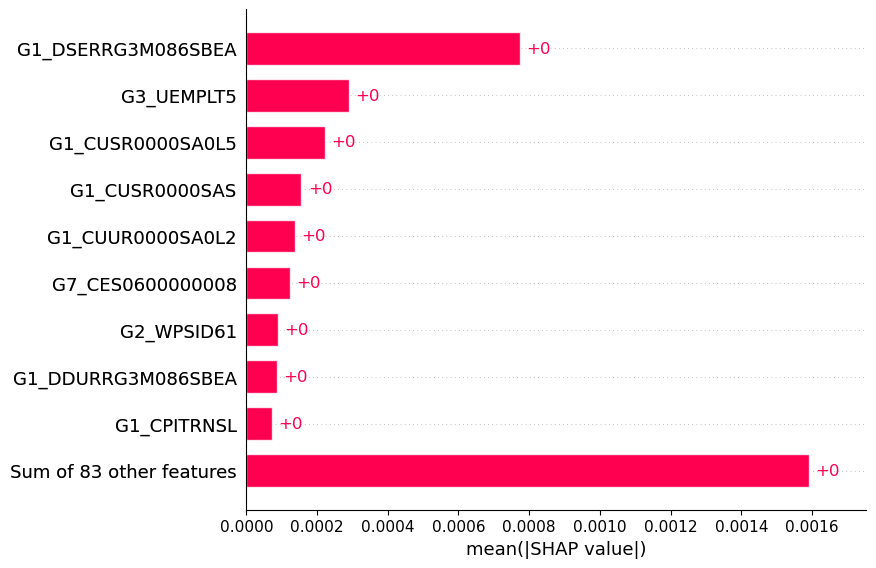

In [141]:
#Shapley Values for Random Forest
import shap 
    
# Fits the explainer
explainer = shap.Explainer(rf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

#Graph Shap Values average
shap.plots.bar(shap_values)

#Graph Shap Values last point
#shap.plots.bar(shap_values.abs.max(0))


In [142]:
########EXAMPLE ADA WITH SPECIFIC SAMPLES 2012 to END  (TOTAL)

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = (data.index.year >= 2012) 
             
X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_ada_list_tot = []
rmse_ada_list_tot = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]

    # Create and fit the AdaBoost model
    ada_reg = AdaBoostRegressor(n_estimators=100, learning_rate=1)
    ada_reg.fit(X_train, y_train)

    # Make predictions
    y_pred = ada_reg.predict(X_test)

  
    # Evaluate the model
    mse_ada_tot = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for tot {target_var}: {mse_ada_tot:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_ada_tot = mean_absolute_error(y_test, y_pred)
    print(f"MAE_ada_tot for {target_var}: {mae_ada_tot}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict[target_var]")
    mae_ada_list_tot.append(mae_ada_tot)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_ada_tot = np.sqrt(mse_ada_tot)
    print(f"RMSE_ada_tot for {target_var}: {rmse_ada_tot}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict['{target_var}']")
    rmse_ada_list_tot.append(rmse_ada_tot)
    
    mae_ada_dict_tot = dict(zip(target_variables, mae_ada_list_tot))
    rmse_ada_dict_tot = dict(zip(target_variables, rmse_ada_list_tot))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_ada_tot = mae_ada_dict_tot[target_var] / mae_RW_dict_tot[target_var]
    Ratio_RMSE_ada_tot = rmse_ada_dict_tot[target_var] / rmse_RW_dict_tot[target_var]
    print(f"Ratio MAE_ada_tot for {target_var}: {Ratio_MAE_ada_tot}")
    print(f"Ratio RMSE_ada_tot for {target_var}: {Ratio_RMSE_ada_tot}\n")

    

Mean Squared Error for tot G0_CPI_1M: 0.00
MAE_ada_tot for G0_CPI_1M: 0.0018288675897100348
RMSE_ada_tot for G0_CPI_1M: 0.002450520398905991
Ratio MAE_ada_tot for G0_CPI_1M: 0.7238442996834353
Ratio RMSE_ada_tot for G0_CPI_1M: 0.7210535388246665

Mean Squared Error for tot G0_CPI_2M: 0.00
MAE_ada_tot for G0_CPI_2M: 0.002265860181941061
RMSE_ada_tot for G0_CPI_2M: 0.0029927850249447836
Ratio MAE_ada_tot for G0_CPI_2M: 0.8322095479818273
Ratio RMSE_ada_tot for G0_CPI_2M: 0.8506846679841943

Mean Squared Error for tot G0_CPI_3M: 0.00
MAE_ada_tot for G0_CPI_3M: 0.0021626406226287797
RMSE_ada_tot for G0_CPI_3M: 0.0028331869779849887
Ratio MAE_ada_tot for G0_CPI_3M: 0.8295435436914702
Ratio RMSE_ada_tot for G0_CPI_3M: 0.8168780800832708

Mean Squared Error for tot G0_CPI_4M: 0.00
MAE_ada_tot for G0_CPI_4M: 0.0022168533940716377
RMSE_ada_tot for G0_CPI_4M: 0.003070622219085177
Ratio MAE_ada_tot for G0_CPI_4M: 0.8890617914550734
Ratio RMSE_ada_tot for G0_CPI_4M: 0.9155673204378453

Mean Square

In [143]:
########EXAMPLE ADA WITH SPECIFIC SAMPLES 2012 to Jun 2020 (low)

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2012) & (data.index.year < 2020) ) | ((data.index.month <= 1) & (data.index.year == 2020))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_ada_list_low = []
rmse_ada_list_low = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]

    # Create and fit the AdaBoost model
    ada_reg = AdaBoostRegressor(n_estimators=100, learning_rate=1)
    ada_reg.fit(X_train, y_train)

    # Make predictions
    y_pred = ada_reg.predict(X_test)

  
    # Evaluate the model
    mse_ada_low = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for Low {target_var}: {mse_ada_low:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_ada_low = mean_absolute_error(y_test, y_pred)
    print(f"MAE_ada_low for {target_var}: {mae_ada_low}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict_low[target_var]")
    mae_ada_list_low.append(mae_ada_low)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_ada_low = np.sqrt(mse_ada_low)
    print(f"RMSE_ada_low for {target_var}: {rmse_ada_low}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict_low['{target_var}']")
    rmse_ada_list_low.append(rmse_ada_low)
    
    mae_ada_dict_low = dict(zip(target_variables, mae_ada_list_low))
    rmse_ada_dict_low = dict(zip(target_variables, rmse_ada_list_low))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_ada_low = mae_ada_dict_low[target_var] / mae_RW_dict_low[target_var]
    Ratio_RMSE_ada_low = rmse_ada_dict_low[target_var] / rmse_RW_dict_low[target_var]
    print(f"Ratio MAE_ada_low for {target_var}: {Ratio_MAE_ada_low}")
    print(f"Ratio RMSE_ada_low for {target_var}: {Ratio_RMSE_ada_low}\n")

    

Mean Squared Error for Low G0_CPI_1M: 0.00
MAE_ada_low for G0_CPI_1M: 0.001409700964374211
RMSE_ada_low for G0_CPI_1M: 0.0018481377823616524
Ratio MAE_ada_low for G0_CPI_1M: 0.6464596678500307
Ratio RMSE_ada_low for G0_CPI_1M: 0.6536380103084795

Mean Squared Error for Low G0_CPI_2M: 0.00
MAE_ada_low for G0_CPI_2M: 0.002017085046979862
RMSE_ada_low for G0_CPI_2M: 0.0025988991107240575
Ratio MAE_ada_low for G0_CPI_2M: 0.8415430195065692
Ratio RMSE_ada_low for G0_CPI_2M: 0.8470309423423342

Mean Squared Error for Low G0_CPI_3M: 0.00
MAE_ada_low for G0_CPI_3M: 0.0021692376220284644
RMSE_ada_low for G0_CPI_3M: 0.0028146787379070975
Ratio MAE_ada_low for G0_CPI_3M: 0.9462065932200107
Ratio RMSE_ada_low for G0_CPI_3M: 0.9218885298512244

Mean Squared Error for Low G0_CPI_4M: 0.00
MAE_ada_low for G0_CPI_4M: 0.0019457707025092117
RMSE_ada_low for G0_CPI_4M: 0.0026209090043581643
Ratio MAE_ada_low for G0_CPI_4M: 0.8940948154269961
Ratio RMSE_ada_low for G0_CPI_4M: 0.9003610410276631

Mean Squar

In [144]:
########EXAMPLE ADA WITH SPECIFIC SAMPLES from  Jul 2020 (high)

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# assume your time series has a datetime index
# and you want to split the data from 1968 to 2018 for training, and 2019-2022 for testing
mask_train = (data.index.year <= 2011) 
mask_test = ((data.index.year >= 2020) & (data.index.month >= 7) ) | ((data.index.month <= 12) & (data.index.year == 2022))

X = datax
X_train = X[mask_train]
X_test = X[mask_test]

y_train = y[mask_train]
y_test = y[mask_test]

# Target variable names
target_vars = ["G0_CPI_1M", "G0_CPI_2M", "G0_CPI_3M", "G0_CPI_4M", "G0_CPI_5M", "G0_CPI_6M"]

mae_ada_list_high = []
rmse_ada_list_high = []

for target_var in target_vars:
    y = datay[target_var]
    y_train = y[mask_train]
    y_test = y[mask_test]

    # Create and fit the AdaBoost model
    ada_reg = AdaBoostRegressor(n_estimators=100, learning_rate=1)
    ada_reg.fit(X_train, y_train)

    # Make predictions
    y_pred = ada_reg.predict(X_test)

  
    # Evaluate the model
    mse_ada_high = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for high {target_var}: {mse_ada_high:.2f}')
    
   
    # Compute Mean Absolute Error (MAE)
    mae_ada_high = mean_absolute_error(y_test, y_pred)
    print(f"MAE_ada_high for {target_var}: {mae_ada_high}")
  #  print(f"MAE_AR for {target_var}: mae_RW_dict_high[target_var]")
    mae_ada_list_high.append(mae_ada_high)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse_ada_high = np.sqrt(mse_ada_high)
    print(f"RMSE_ada_high for {target_var}: {rmse_ada_high}")
   # print(f"RMSE_AR for {target_var}: rmse_RW_dict_high['{target_var}']")
    rmse_ada_list_high.append(rmse_ada_high)
    
    mae_ada_dict_high = dict(zip(target_variables, mae_ada_list_high))
    rmse_ada_dict_high = dict(zip(target_variables, rmse_ada_list_high))

    
    # Compute Ratio of MAE and RMSE for Random Forest
    Ratio_MAE_ada_high = mae_ada_dict_high[target_var] / mae_RW_dict_high[target_var]
    Ratio_RMSE_ada_high = rmse_ada_dict_high[target_var] / rmse_RW_dict_high[target_var]
    print(f"Ratio MAE_ada_high for {target_var}: {Ratio_MAE_ada_high}")
    print(f"Ratio RMSE_ada_high for {target_var}: {Ratio_RMSE_ada_high}\n")

    

Mean Squared Error for high G0_CPI_1M: 0.00
MAE_ada_high for G0_CPI_1M: 0.0030405811855538254
RMSE_ada_high for G0_CPI_1M: 0.0038507877006485466
Ratio MAE_ada_high for G0_CPI_1M: 0.9790911130773016
Ratio RMSE_ada_high for G0_CPI_1M: 0.9045677783006709

Mean Squared Error for high G0_CPI_2M: 0.00
MAE_ada_high for G0_CPI_2M: 0.003048135331717293
RMSE_ada_high for G0_CPI_2M: 0.003952308870676931
Ratio MAE_ada_high for G0_CPI_2M: 1.0049617202986165
Ratio RMSE_ada_high for G0_CPI_2M: 1.1164924693645197

Mean Squared Error for high G0_CPI_3M: 0.00
MAE_ada_high for G0_CPI_3M: 0.0032039159233917588
RMSE_ada_high for G0_CPI_3M: 0.003996929213594218
Ratio MAE_ada_high for G0_CPI_3M: 0.9228599972088298
Ratio RMSE_ada_high for G0_CPI_3M: 0.9633999572130783

Mean Squared Error for high G0_CPI_4M: 0.00
MAE_ada_high for G0_CPI_4M: 0.003058170460445935
RMSE_ada_high for G0_CPI_4M: 0.003723849483522161
Ratio MAE_ada_high for G0_CPI_4M: 0.8559413103182464
Ratio RMSE_ada_high for G0_CPI_4M: 0.85168232733